In [5]:
%reload_ext autoreload
%autoreload 2

import os, psutil

from rocket_fft import numpy_like, scipy_like

numpy_like()

os.environ['NUMEXPR_MAX_THREADS'] = '20'
os.environ['NUMBA_DEBUGINFO'] = '0'

from alphadia.extraction import processlogger
processlogger.init_logging()
import logging

logger = logging.getLogger()

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import neptune.new as neptune
import alphatims.bruker as bruker

from alphabase.spectral_library.base import SpecLibBase
from alphadia.extraction.planning import Plan, Workflow

yaml_file = 'config.yaml'

raw_files = ['/Users/georgwallmann/Documents/data/alphadia_benchmarking/raw_data/2023_04_27_synchroPasef_mDIA/20230422_TIMS05_PaSk_MCT_SA_HeLa_mDIA_SyP_2scans_each150Da_S2-B6_1_1804.d']

output_location = '/Users/georgwallmann/Documents/data/alphadia_benchmarking/raw_data/2023_04_27_synchroPasef_mDIA/4SyP'

try:
    neptune_token = os.environ['NEPTUNE_TOKEN']
except KeyError:
    logger.error('NEPTUNE_TOKEN environtment variable not set')


In [6]:
test_lib = SpecLibBase()
test_lib_location = '/Users/georgwallmann/Documents/data/alphadia_benchmarking/libraries/marvin_scp/MSfragger_library_mod_noLossType_d0_d4_d8_d12_shared_eg_n_fragments.hdf'
test_lib.load_hdf(test_lib_location, load_mod_seq=True)


test_lib.precursor_df = test_lib.precursor_df[test_lib.precursor_df['channel'] == 0]

In [7]:
test_lib.precursor_df.channel.value_counts()

0    91732
Name: channel, dtype: int64

0:00:21.172239  PROGRESS:       _   _      _         ___ ___   _   
0:00:21.172657  PROGRESS:      /_\ | |_ __| |_  __ _|   \_ _| /_\  
0:00:21.172900  PROGRESS:     / _ \| | '_ \ ' \/ _` | |) | | / _ \ 
0:00:21.173135  PROGRESS:    /_/ \_\_| .__/_||_\__,_|___/___/_/ \_\
0:00:21.173415  PROGRESS:            |_|                            
0:00:21.173653  PROGRESS: 
0:00:21.174106  INFO: loading default config from /Users/georgwallmann/Documents/git/alphadia/alphadia/extraction/../../misc/config/default.yaml
0:00:21.180444  INFO: Applying config update from dict
0:00:21.180864  PROGRESS: version: 1.0.2
0:00:21.181088  PROGRESS: hostname: Georgs-MacBook-Pro.local
0:00:21.181290  PROGRESS: date: 2023-05-07 19:03:53
0:00:23.422918  INFO: renaming precursor_columns columns
0:00:23.423769  INFO: renaming fragment_columns columns
0:00:23.424172  INFO: ========= Library Stats =========
0:00:23.424379  INFO: Number of precursors: 91,732
0:00:23.441739  INFO: 	thereof targets:45,867
0:00:23.4422

7820


100%|██████████| 13990/13990 [00:01<00:00, 10395.99it/s]
0:07:45.991303  INFO: Scored 13990 candidates
0:07:45.996240  INFO: 0.30% of targets failed, 0.52% of decoys failed
0:07:46.236172  INFO: number of dfs in features: 1, total number of features: 13933


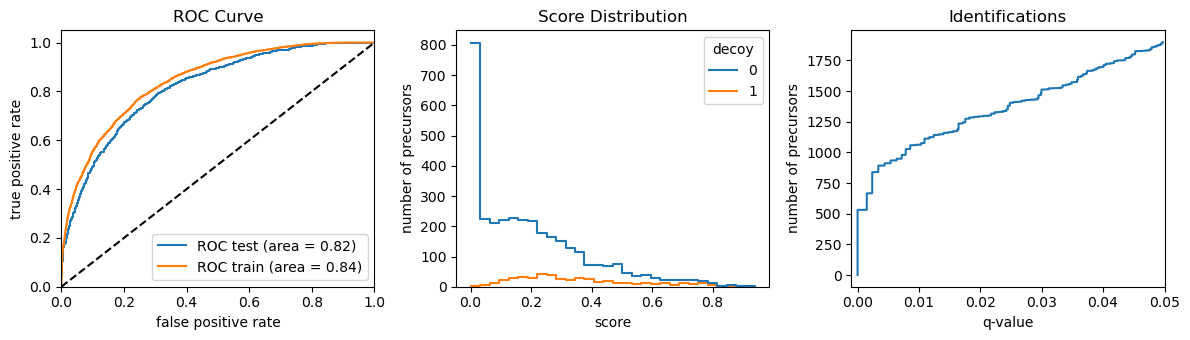

0:07:47.183003  PROGRESS: === checking if recalibration conditions were reached, target 200 precursors ===
0:07:47.183629  PROGRESS: Accumulated precursors: 3,897, 0.01 FDR: 1,063, 0.001 FDR: 532
0:07:47.184375  INFO: calibration group: precursor, fitting mz estimator 


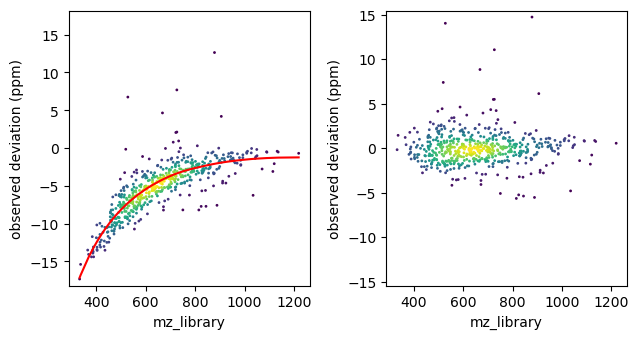

0:07:47.279025  INFO: calibration group: precursor, fitting rt estimator 


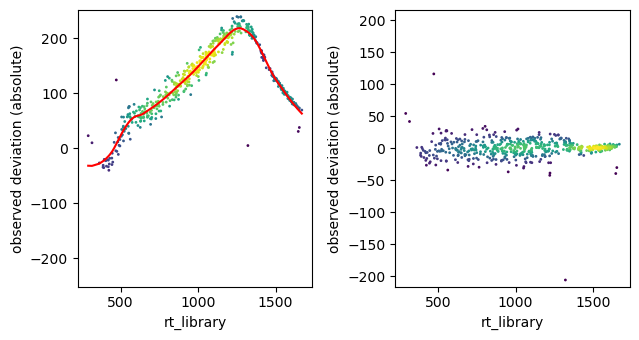

0:07:47.372216  INFO: calibration group: precursor, fitting mobility estimator 


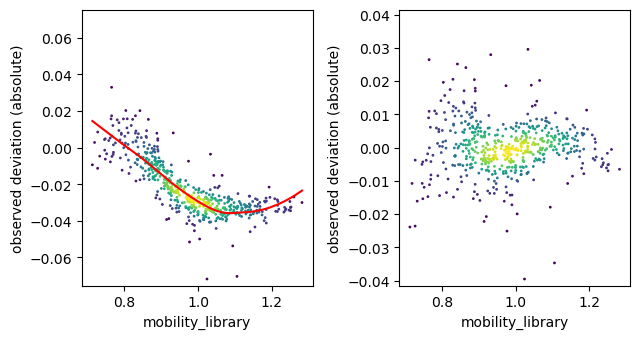

0:07:47.765705  INFO: calibration group: fragment, fitting mz estimator 


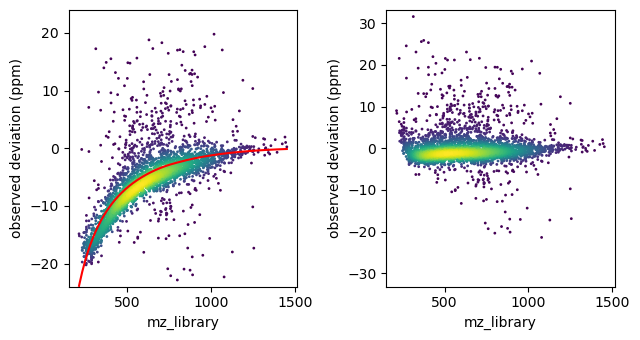

0:07:47.974600  INFO: calibration group: precursor, predicting mz
0:07:47.985566  INFO: calibration group: precursor, predicting rt
0:07:48.016157  INFO: calibration group: precursor, predicting mobility
0:07:48.026420  INFO: calibration group: fragment, predicting mz
0:07:48.336764  PROGRESS: === Epoch 1, step 0, extracting elution groups 0 to 4000 ===
0:07:48.340069  PROGRESS: MS1 error: 10, MS2 error: 15, RT error: 40, Mobility error: 0.04
0:07:48.342106  INFO: Duty cycle consists of 3 frames, 0.34 seconds cycle time
0:07:48.342540  INFO: Duty cycle consists of 928 scans, 0.00065 1/K_0 resolution
0:07:48.342734  INFO: FWHM in RT is 4.53 seconds, sigma is 2.82
0:07:48.343010  INFO: FWHM in mobility is 0.011 1/K_0, sigma is 7.47


7814


100%|██████████| 13278/13278 [00:01<00:00, 10592.72it/s]
0:08:18.705070  INFO: Scored 13278 candidates
0:08:18.709469  INFO: 0.53% of targets failed, 0.78% of decoys failed
0:08:18.877036  INFO: number of dfs in features: 1, total number of features: 13191


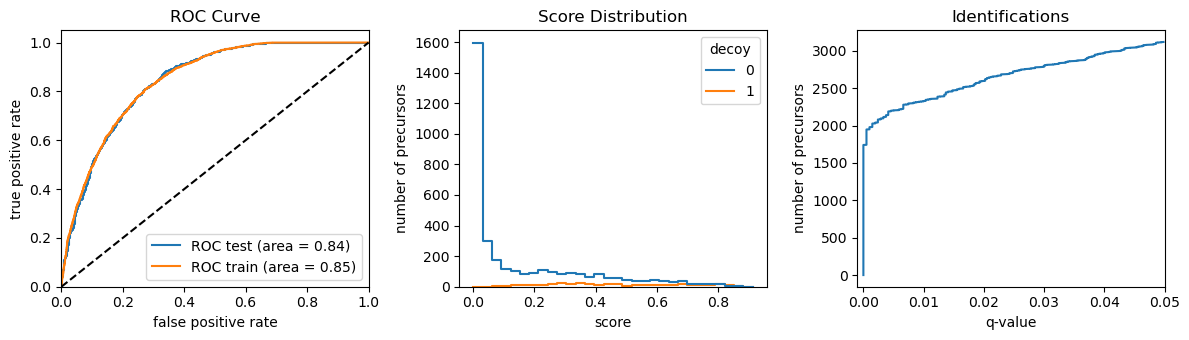

0:08:19.435531  PROGRESS: === checking if recalibration conditions were reached, target 400 precursors ===
0:08:19.435831  PROGRESS: Accumulated precursors: 3,882, 0.01 FDR: 2,328, 0.001 FDR: 1,948
0:08:19.437465  INFO: calibration group: precursor, fitting mz estimator 


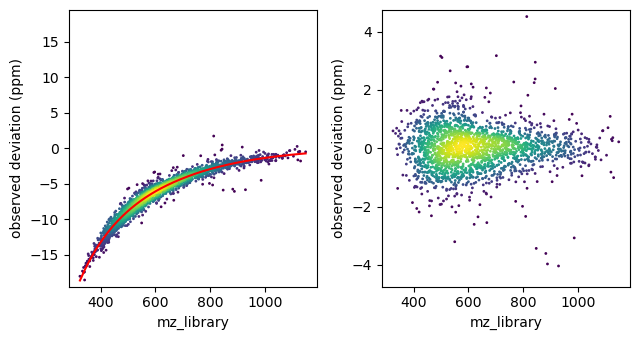

0:08:19.573798  INFO: calibration group: precursor, fitting rt estimator 


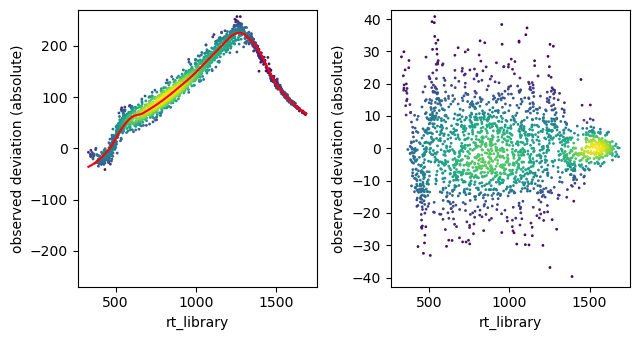

0:08:19.710088  INFO: calibration group: precursor, fitting mobility estimator 


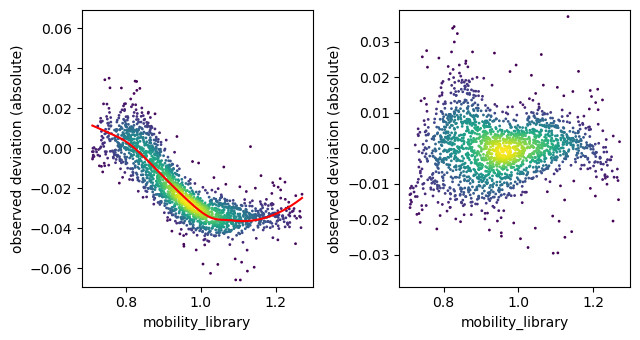

0:08:19.853303  INFO: calibration group: fragment, fitting mz estimator 


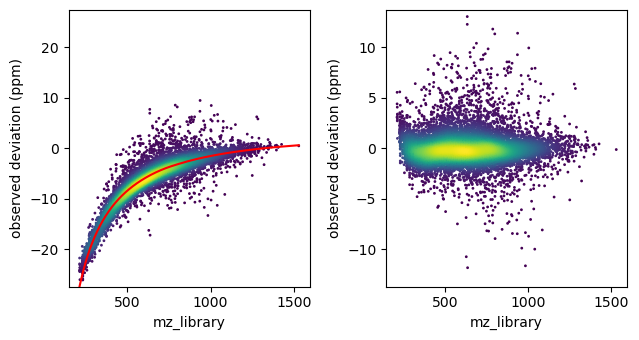

0:08:21.065993  INFO: calibration group: precursor, predicting mz
0:08:21.075340  INFO: calibration group: precursor, predicting rt
0:08:21.104820  INFO: calibration group: precursor, predicting mobility
0:08:21.116554  INFO: calibration group: fragment, predicting mz
0:08:21.420102  PROGRESS: === Epoch 2, step 0, extracting elution groups 0 to 4000 ===
0:08:21.423407  PROGRESS: MS1 error: 10, MS2 error: 15, RT error: 40, Mobility error: 0.04
0:08:21.425173  INFO: Duty cycle consists of 3 frames, 0.34 seconds cycle time
0:08:21.425463  INFO: Duty cycle consists of 928 scans, 0.00065 1/K_0 resolution
0:08:21.425676  INFO: FWHM in RT is 4.03 seconds, sigma is 2.51
0:08:21.426028  INFO: FWHM in mobility is 0.009 1/K_0, sigma is 6.19


7828


100%|██████████| 12926/12926 [00:01<00:00, 10400.19it/s]
0:08:51.861914  INFO: Scored 12926 candidates
0:08:51.866741  INFO: 0.39% of targets failed, 0.82% of decoys failed
0:08:52.039386  INFO: number of dfs in features: 1, total number of features: 12848


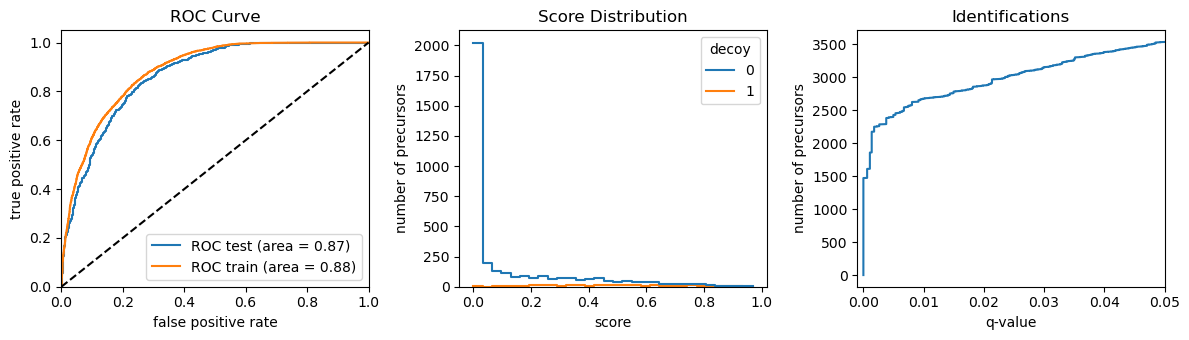

0:08:52.757005  PROGRESS: === checking if recalibration conditions were reached, target 600 precursors ===
0:08:52.757450  PROGRESS: Accumulated precursors: 3,880, 0.01 FDR: 2,672, 0.001 FDR: 1,609
0:08:52.758593  INFO: calibration group: precursor, fitting mz estimator 


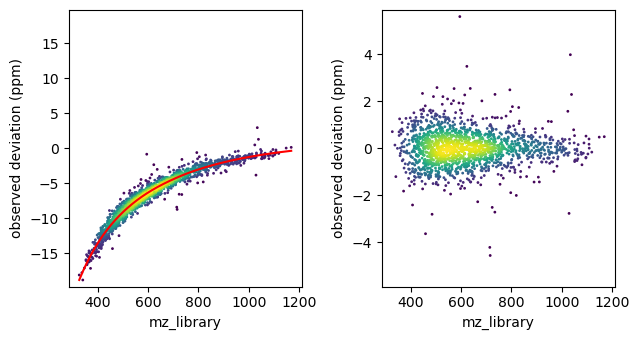

0:08:52.890491  INFO: calibration group: precursor, fitting rt estimator 


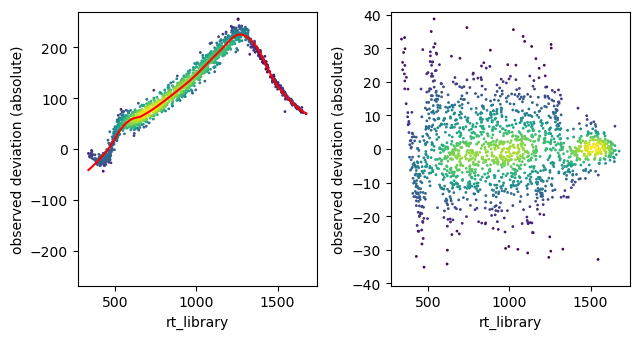

0:08:53.023641  INFO: calibration group: precursor, fitting mobility estimator 


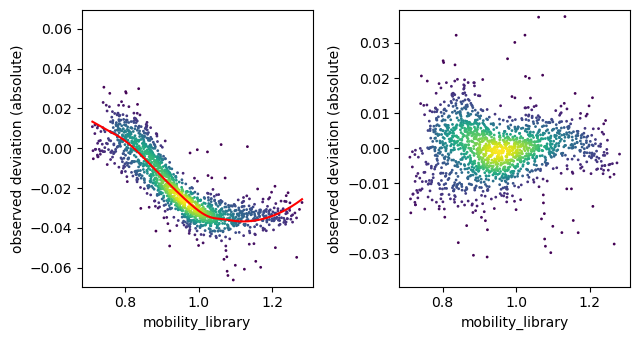

0:08:53.159860  INFO: calibration group: fragment, fitting mz estimator 


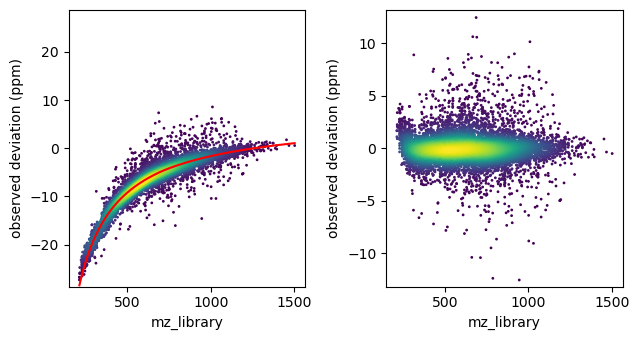

0:08:54.015169  INFO: calibration group: precursor, predicting mz
0:08:54.026523  INFO: calibration group: precursor, predicting rt
0:08:54.055717  INFO: calibration group: precursor, predicting mobility
0:08:54.068027  INFO: calibration group: fragment, predicting mz
0:08:54.378975  INFO: calibration group: precursor, predicting mz
0:08:54.393495  INFO: calibration group: precursor, predicting rt
0:08:54.423424  INFO: calibration group: precursor, predicting mobility
0:08:54.437496  INFO: calibration group: fragment, predicting mz


In [8]:
plan = Plan(raw_files, config_update = 
            {'extraction':
                {
                    'target_mobility_tolerance': 0.04,
                    'target_rt_tolerance': 40,
                    'target_ms1_tolerance': 10,
                    'min_epochs': 3,
                }
            }
        )
plan.from_spec_lib_base(test_lib)
for dia_data, precursors_flat, fragments_flat in plan.get_run_data():
    
    reference_flat = precursors_flat[precursors_flat['channel'] == 0].copy()

    workflow = Workflow(
        plan.config, 
        dia_data, 
        reference_flat, 
        fragments_flat
    )

    workflow.calibration()


0:21:38.899597  PROGRESS: MS1 error: 10, MS2 error: 15, RT error: 40, Mobility error: 0.04
0:21:38.916849  INFO: Duty cycle consists of 3 frames, 0.34 seconds cycle time
0:21:38.917313  INFO: Duty cycle consists of 928 scans, 0.00065 1/K_0 resolution
0:21:38.917639  INFO: FWHM in RT is 4.01 seconds, sigma is 2.50
0:21:38.917977  INFO: FWHM in mobility is 0.009 1/K_0, sigma is 6.15


91732


100%|██████████| 327196/327196 [00:47<00:00, 6908.80it/s]
0:30:22.455139  INFO: Scored 327196 candidates
0:30:22.590732  INFO: 0.41% of targets failed, 0.62% of decoys failed


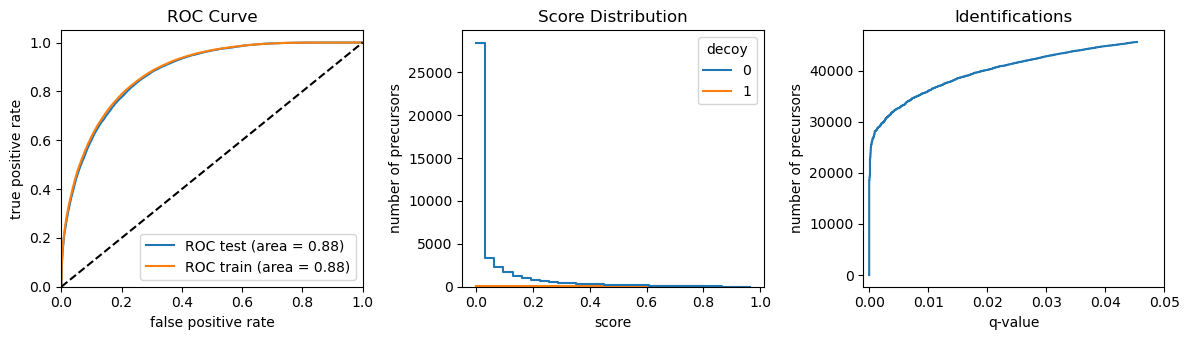

0:31:04.943004  PROGRESS: === extraction finished, 0.05 FDR: 43,615, 0.01 FDR: 35,684, 0.001 FDR: 28,105 ===


In [26]:
df_d0 = workflow.extraction()

In [5]:
precursors_flat

elution_group_idx  precursor_idx  decoy  flat_frag_start_idx  \
0                      0              0      0                    0   
1                  32672           3553      0               415555   
2                  32672           3554      1              2331695   
3                  19302           2673      0               246895   
4                  19302           2217      1              2342362   
...                  ...            ...    ...                  ...   
91727              42088          91727      1              2909793   
91728               5788          91730      1              2909814   
91729               5785          91731      1              2909846   
91730               5788          91728      0                73755   
91731               5785          91729      0                73697   

       flat_frag_stop_idx  charge   rt_library  mobility_library   mz_library  \
0                       6       2   881.258845          0.770291   402.242340   
1                  415561       2   852.694376          0.785545   410.221605   
2                 2331701       2   852.694376          0.785545   445.260728   
3                  246901       2  1208.783419          0.855290   476.766180   
4                 2342368       2  1208.783419          0.855290   476.766178   
...                   ...     ...          ...               ...          ...   
91727             2909814       4  1411.850560          1.275914  1129.089165   
91728             2909846       4   498.426790          1.120423   939.208835   
91729             2909865       5   499.320052          1.095016   751.568523   
91730               73787       4   498.426790          1.120423   932.201015   
91731               73716       5   499.320052          1.095016   745.962267   

                                                sequence  ...  proteins  \
0                                                FSPVLGR  ...    Q9NRG9   
1                                                FGLPDSR  ...    Q9H2M9   
2                                                FLLPDTR  ...    Q9H2M9   
3                                                INDFFLR  ...  Q14643-2   
4                                                IQDFFVR  ...  Q14643-2   
...                                                  ...  ...       ...   
91727   DTAGVPAPAPDSALDSAPTPASAPAPAPALAQAPALSPSLASAPEELK  ...    Q7Z2T5   
91728  ALSAAGAAGSAGGSSGAAGAAGGGAGAGTRPGDGGTASAGAAGPGAASK  ...    Q9UKY7   
91729  ALSAAGAAGSAGGSSGAAGAAGGGAGAGTRPGDGGTASAGAAGPGAASK  ...    Q9UKY7   
91730  AASAAGAAGSAGGSSGAAGAAGGGAGAGTRPGDGGTASAGAAGPGAATK  ...    Q9UKY7   
91731  AASAAGAAGSAGGSSGAAGAAGGGAGAGTRPGDGGTASAGAAGPGAATK  ...    Q9UKY7   

      channel       i_0       i_1       i_2       i_3       i_4       i_5  \
0           0  0.624179  0.285548  0.074148  0.014007  0.002118  0.000000   
1           0  0.628183  0.280776  0.074256  0.014497  0.002288  0.000000   
2           0  0.628183  0.280776  0.074256  0.014497  0.002288  0.000000   
3           0  0.567588  0.311733  0.095700  0.021223  0.003756  0.000000   
4           0  0.567588  0.311733  0.095700  0.021223  0.003756  0.000000   
...       ...       ...       ...       ...       ...       ...       ...   
91727       0  0.082999  0.196205  0.242358  0.207442  0.137843  0.075598   
91728       0  0.141394  0.260841  0.256465  0.177225  0.096112  0.043393   
91729       0  0.141394  0.260841  0.256465  0.177225  0.096112  0.043393   
91730       0  0.141394  0.260841  0.256465  0.177225  0.096112  0.043393   
91731       0  0.141394  0.260841  0.256465  0.177225  0.096112  0.043393   

       nAA                                           raw_name  
0        7  20230422_TIMS05_PaSk_MCT_SA_HeLa_mDIA_SyP_2sca...  
1        7  20230422_TIMS05_PaSk_MCT_SA_HeLa_mDIA_SyP_2sca...  
2        7  20230422_TIMS05_PaSk_MCT_SA_HeLa_mDIA_SyP_2sca...  
3        7  20230422_TIMS05_PaSk_MCT_SA_HeLa_mDIA_SyP_2sca...  
4        7  20230422_TIMS05_PaSk_MC

In [10]:
workflow.calibration_manager.predict(precursors_flat, 'precursor')
workflow.calibration_manager.predict(fragments_flat, 'fragment')


0:09:30.578975  INFO: calibration group: precursor, predicting mz
0:09:30.601417  INFO: calibration group: precursor, predicting rt
0:09:30.661936  INFO: calibration group: precursor, predicting mobility
0:09:30.690512  INFO: calibration group: fragment, predicting mz


In [9]:
df_d0.to_csv('/Users/georgwallmann/Documents/data/alphadia_benchmarking/raw_data/2023_04_27_synchroPasef_mDIA/20230422_TIMS05_PaSk_MCT_SA_HeLa_mDIA_SyP_2scans_each150Da_S2-B6_1_1804_d0.tsv', index=False, sep='\t')


In [10]:
precursors_flat.to_csv('/Users/georgwallmann/Documents/data/alphadia_benchmarking/raw_data/2023_04_27_synchroPasef_mDIA/20230422_TIMS05_PaSk_MCT_SA_HeLa_mDIA_SyP_2scans_each150Da_S2-B6_1_1804_precursors_flat.tsv', index=False, sep='\t')
fragments_flat.to_csv('/Users/georgwallmann/Documents/data/alphadia_benchmarking/raw_data/2023_04_27_synchroPasef_mDIA/20230422_TIMS05_PaSk_MCT_SA_HeLa_mDIA_SyP_2scans_each150Da_S2-B6_1_1804_fragments_flat.tsv', index=False, sep='\t')

In [9]:
df_d0 = pd.read_csv('/Users/georgwallmann/Documents/data/alphadia_benchmarking/raw_data/2023_04_27_synchroPasef_mDIA/20230422_TIMS05_PaSk_MCT_SA_HeLa_mDIA_SyP_2scans_each150Da_S2-B6_1_1804_d0.tsv', sep='\t')
precursors_flat = pd.read_csv('/Users/georgwallmann/Documents/data/alphadia_benchmarking/raw_data/2023_04_27_synchroPasef_mDIA/20230422_TIMS05_PaSk_MCT_SA_HeLa_mDIA_SyP_2scans_each150Da_S2-B6_1_1804_precursors_flat.tsv', sep='\t')
fragments_flat = pd.read_csv('/Users/georgwallmann/Documents/data/alphadia_benchmarking/raw_data/2023_04_27_synchroPasef_mDIA/20230422_TIMS05_PaSk_MCT_SA_HeLa_mDIA_SyP_2scans_each150Da_S2-B6_1_1804_fragments_flat.tsv', sep='\t')

In [8]:
df_d0.columns

Index(['precursor_idx', 'elution_group_idx', 'charge', 'rank', 'scan_start',
       'scan_stop', 'scan_center', 'frame_start', 'frame_stop', 'frame_center',
       'precursor_mass_error', 'mz_library', 'mz_observed',
       'precursor_isotope_correlation', 'sum_precursor_intensity',
       'n_fragments_matched', 'n_fragments', 'fraction_fragments',
       'intensity_correlation', 'sum_fragment_intensity',
       'mean_fragment_intensity', 'mean_fragment_nonzero', 'n_observations',
       'mean_observation_score', 'var_observation_score', 'fragment_coverage',
       'fragment_scan_correlation', 'fragment_frame_correlation',
       'template_scan_correlation', 'template_frame_correlation', 'fwhm_rt',
       'fwhm_mobility', 'sum_b_ion_intensity', 'sum_y_ion_intensity',
       'observed_difference_b_y', 'expected_difference_b_y', 'aggreement_b_y',
       'base_width_mobility', 'base_width_rt', 'rt_observed',
       'mobility_observed', 'decoy', 'mz_calibrated', 'rt_library',
       'rt_ca

In [11]:
from alphadia.extraction import hybridselection, scoring, quadrupole

In [12]:
precursors_flat.columns

Index(['elution_group_idx', 'precursor_idx', 'decoy', 'flat_frag_start_idx',
       'flat_frag_stop_idx', 'charge', 'rt_library', 'mobility_library',
       'mz_library', 'sequence', 'genes', 'proteins', 'channel', 'i_0', 'i_1',
       'i_2', 'i_3', 'i_4', 'i_5', 'nAA', 'raw_name', 'mz_calibrated',
       'rt_calibrated', 'mobility_calibrated'],
      dtype='object')

In [13]:
from alphadia.extraction import validate
class Multiplexer():

    def __init__(self,
        precursors_flat: pd.DataFrame,
        fragments_flat: pd.DataFrame,
        psm_df: pd.DataFrame,
        mz_column: str = 'mz_calibrated',
        ) -> None:

        self.precursors_flat = precursors_flat
        self.fragments_flat = fragments_flat
        self.psm_df = psm_df

        self.mz_column = mz_column

    def __call__(self):
        # make sure input psm's have all required columns
        self.psm_df = self.psm_df[self.psm_df['decoy'] == 0].copy()
        anchor_ids = self.psm_df[['elution_group_idx', 'scan_start' ,'scan_stop', 'scan_center', 'frame_start', 'frame_stop', 'frame_center','rank']]
        
        candidates_df = self.precursors_flat[(precursors_flat['decoy'] == 0)]
        candidates_df = candidates_df[candidates_df['elution_group_idx'].isin(anchor_ids['elution_group_idx'])]
        candidates_df = candidates_df[['precursor_idx', 'elution_group_idx', 'channel', 'decoy','flat_frag_start_idx','flat_frag_stop_idx','charge',self.mz_column]+utils.get_isotope_column_names(candidates_df.columns)]

        candidates_df = candidates_df.merge(anchor_ids, on='elution_group_idx', how='outer')
        candidates_df = candidates_df.sort_values('precursor_idx')
        validate.candidates(candidates_df)
        return candidates_df

In [15]:
df_d0.head(10)

precursor_idx  elution_group_idx  charge  rank  scan_start  scan_stop  \
0         227978              36328       4     0         350        391   
1         221844              12953       3     0         553        590   
2         223932              42379       3     0         401        472   
3         215195              42308       2     0         104        179   
4         228434               8231       4     0         366        405   
5         226677               7434       3     0         391        428   
6         202813              45314       2     0         336        387   
7         227860              21721       3     0         139        221   
8         209542              27566       2     0         137        184   
9         227012              19545       3     0         541        650   

   scan_center  frame_start  frame_stop  frame_center  ...   rt_library  \
0          370         8194        8257          8224  ...   827.285867   
1          571         5845        5932          5887  ...   608.433631   
2          437        14332       14413         14371  ...  1508.473607   
3          141        10180       10255         10216  ...  1035.862283   
4          385        13825       13870         13846  ...  1360.950265   
5          409        14254       14317         14284  ...  1510.300654   
6          361         6259        6346          6301  ...   672.329952   
7          187         6805        6898          6853  ...   718.288533   
8          160         7036        7105          7069  ...   744.458760   
9          607         5317        5410          5362  ...   569.562591   

   rt_calibrated   rt_error  mobility_library  mobility_calibrated  \
0     927.992395   7.993689          1.089667             1.053493   
1     669.176164   1.008956          0.950775             0.927191   
2    1629.054462   6.051129          1.035596             1.000864   
3    1196.404217 -33.853680          1.231819             1.200048   
4    1566.537068   8.849895          1.081993             1.046058   
5    1630.135907  -4.925946          1.060460             1.025105   
6     739.479280 -22.204804          1.098655             1.062264   
7     794.262631 -14.205868          1.204493             1.170577   
8     825.753387 -21.129607          1.212121             1.178742   
9     621.200773 -10.721586          0.931810             0.911523   

   mobility_error  proteins  channel         proba  qval  
0        0.007283    Q8NC51        0  6.537099e-07   0.0  
1        0.003628  Q01844-3        0  1.132043e-06   0.0  
2        0.016593    P07437        0  1.409624e-06   0.0  
3        0.008788  P68363-2        0  1.428332e-06   0.0  
4        0.005020    O43169        0  1.563868e-06   0.0  
5        0.010456  P31327-3        0  1.662206e-06   0.0  
6        0.004331    P67809        0  1.897304e-06   0.0  
7        0.008518    P29966        0  2.183110e-06   0.0  
8        0.017809  Q15366-2        0  2.739766e-06   0.0  
9       -0.003980    Q92945        0  2.918506e-06   0.0  

[10 rows x 53 columns]

In [16]:
precursors_flat[precursors_flat['elution_group_idx'] == 42380][['elution_group_idx','precursor_idx','decoy','channel','sequence','charge']]

elution_group_idx  precursor_idx  decoy  channel      sequence  charge
110094              42380         110095      0        4  EVDEQMLNVQNK       2
110095              42380         110096      0        0  EVDEQMLNVQNK       2
110096              42380         110160      0        8  EVDEQMLNVQNK       2
110160              42380         110094      1        0  ELDEQMLNVQQK       2
110165              42380         110165      0       12  EVDEQMLNVQNK       2

In [17]:
precursors_sample = precursors_flat[precursors_flat['precursor_idx'].isin([220865, 215195,110096])]

In [267]:
reference_flat = precursors_flat[precursors_flat['channel'] == 0].copy()

In [373]:
config = hybridselection.HybridCandidateConfig()
config.update(workflow.config['extraction']['HybridCandidateConfig'])
config.update({
    'rt_tolerance': 40,
    'mobility_tolerance': 0.07,
    'candidate_count': 1,
    'precursor_mz_tolerance': 10,
    'fragment_mz_tolerance': 15,
    'sigma_scale_mobility': 2.,
    'sigma_scale_rt': 0.3,
    'candidate_count': 2,
    'center_fraction': 0.5,
    'max_cardinality':10,
})

extraction = hybridselection.HybridCandidateSelection(
    dia_data,
    reference_flat.head(10000),
    fragments_flat,
    config.jitclass(),
    rt_column = f'rt_calibrated',
    mobility_column = f'mobility_calibrated',
    precursor_mz_column = f'mz_calibrated',
    fragment_mz_column = f'mz_calibrated',
    fwhm_rt = 5.,
    fwhm_mobility = 0.01,
    thread_count=10,
    debug=False
)
candidates_df = extraction()

1 day, 15:45:03.360946  INFO: Duty cycle consists of 3 frames, 0.34 seconds cycle time
1 day, 15:45:03.361429  INFO: Duty cycle consists of 928 scans, 0.00065 1/K_0 resolution
1 day, 15:45:03.361754  INFO: FWHM in RT is 5.00 seconds, sigma is 1.87
1 day, 15:45:03.362065  INFO: FWHM in mobility is 0.010 1/K_0, sigma is 13.14


10000


100%|██████████| 10000/10000 [00:26<00:00, 374.94it/s]


In [374]:
from alphadia.extraction.scoring import MS2ExtractionWorkflow
from alphadia.extraction import quadrupole

q = quadrupole.SimpleQuadrupole(dia_data.cycle)

scoring_workflow = MS2ExtractionWorkflow(
    dia_data,
    precursors_flat,
    fragments_flat,
    candidates_df,
    q,
    precursor_mz_tolerance=10,
    fragment_mz_tolerance=15,
    rt_column = f'rt_calibrated',
    mobility_column = f'mobility_calibrated',
    precursor_mz_column = f'mz_calibrated',
    fragment_mz_column = f'mz_calibrated',
    debug=False
)
psm, fragments = scoring_workflow() 

100%|██████████| 17685/17685 [00:01<00:00, 10619.59it/s]
1 day, 15:45:42.940138  INFO: Scored 17685 candidates
1 day, 15:45:42.946074  INFO: 0.95% of targets failed, 1.04% of decoys failed


In [375]:
psm = psm[psm['decoy'] == 0]
psm = psm[psm['rank'] == 0]
psm

precursor_idx  elution_group_idx  charge  rank  scan_start  scan_stop  \
0                  0                  0       2     0         794        841   
3              12917                 16       2     0         672        727   
5              12854                 20       2     0         683        726   
9              12942                 32       2     0         781        814   
13             12948                 34       2     0         686        721   
...              ...                ...     ...   ...         ...        ...   
17669          13658              45676       2     0         653        684   
17672          12350              45750       2     0         690        727   
17675          13320              45815       2     0         697        730   
17679          13026              45852       2     0         788        823   
17682          13067              45855       2     0         699        773   

       scan_center  frame_start  frame_stop  frame_center  ...  decoy  \
0              817         8701        8782          8740  ...      0   
3              699         6136        6223          6178  ...      0   
5              704         7120        7207          7162  ...      0   
9              797         6022        6085          6052  ...      0   
13             701         4024        4123          4063  ...      0   
...            ...          ...         ...           ...  ...    ...   
17669          668         7051        7138          7093  ...      0   
17672          708         7474        7561          7516  ...      0   
17675          713         5689        5755          5731  ...      0   
17679          805         5314        5389          5350  ...      0   
17682          734         6589        6685          6640  ...      0   

       mz_calibrated  rt_library  rt_calibrated   rt_error  mobility_library  \
0         402.236922  881.258845     995.554137  -0.872863          0.770291   
3         466.242968  628.588577     690.161978  13.124399          0.864594   
5         466.261161  718.562365     794.049576  21.152450          0.851054   
9         407.749913  629.025562     690.626840  -1.671701          0.777664   
13        454.208165  467.492353     472.500291  -9.764603          0.850319   
...              ...         ...            ...        ...               ...   
17669     501.209613  726.692805     803.890567   3.462217          0.874526   
17672     449.760853  761.794189     846.789020   8.674420          0.802281   
17675     441.240544  563.415410     613.147964  39.294968          0.793749   
17679     403.239139  557.902480     605.827937   3.286809          0.766241   
17682     416.247083  688.977165     758.595393  -2.762568          0.839552   

       mobility_calibrated  mobility_error  proteins  channel  
0                 0.777549       -0.005782    Q9NRG9        0  
3                 0.857156       -0.009095  Q2M2I8-2        0  
5                 0.846184       -0.001356    Q13685        0  
9                 0.784145        0.000553    P49588        0  
13                0.845587        0.001180    P49588        0  
...                    ...             ...       ...      ...  
17669             0.865186        0.002918    Q96NC0        0  
17672             0.805691        0.036550  Q8TF68-2        0  
17675             0.798320        0.040689    O60232        0  
17679             0.773909        0.005617    Q15942        0  
17682             0.836813       -0.011382    Q15942        0  

[4927 rows x 51 columns]

In [376]:
psm['elution_group_idx'].nunique()

4927

In [377]:
from alphadia.extraction import utils

In [378]:
psm = psm.sort_values('elution_group_idx')

In [406]:
multiplex = Multiplexer(precursors_flat, fragments_flat, psm[psm['rank'] == 0].copy())
candidates_df = multiplex()


In [407]:
candidates_df = utils.calculate_score_groups(candidates_df, True).copy()

In [408]:
candidates_df = candidates_df.sort_values('score_group_idx')

In [409]:
candidates_df['score_group_idx'].nunique()

4927

In [410]:
fragments_exclusive = fragments_flat.copy()
fragments_exclusive.loc[fragments_exclusive['cardinality'] > 1, 'mz_calibrated'] = 0

In [411]:
import numba as nb
import alphatims
from alphadia.extraction import plotting
import numba as nb
from tqdm import tqdm
from matplotlib import patches

In [412]:
def assemble_fragments(fragments_flat, fragment_mz_column='mz_calibrated'):
            
    # set cardinality to 1 if not present
    if 'cardinality' in fragments_flat.columns:
        pass
    
    else:
        logging.warning('Fragment cardinality column not found in fragment dataframe. Setting cardinality to 1.')
        fragments_flat['cardinality'] = np.ones(len(fragments_flat), dtype=np.uint8)
    
    # validate dataframe schema and prepare jitclass compatible dtypes
    validate.fragments_flat(fragments_flat)

    return fragments.FragmentContainer(
        fragments_flat['mz_library'].values,
        fragments_flat[fragment_mz_column].values,
        fragments_flat['intensity'].values,
        fragments_flat['type'].values,
        fragments_flat['loss_type'].values,
        fragments_flat['charge'].values,
        fragments_flat['number'].values,
        fragments_flat['position'].values,
        fragments_flat['cardinality'].values
    )

In [413]:
from alphadia.extraction.numba import fragments
from alphadia.extraction import features

In [414]:
from alphadia.extraction.numba import config

@nb.experimental.jitclass()
class CandidateConfigJIT:
     
    score_grouped: nb.boolean
    max_cardinality: nb.uint8
    top_k_fragments: nb.uint32
    top_k_isotopes: nb.uint32
    reference_channel: nb.int16
    
    precursor_mz_tolerance: nb.float32
    fragment_mz_tolerance: nb.float32


    def __init__(self,
            score_grouped: nb.boolean,
            max_cardinality: nb.uint8,
            top_k_fragments: nb.uint32,
            top_k_isotopes: nb.uint32,
            reference_channel: nb.int16,

            precursor_mz_tolerance: nb.float32,
            fragment_mz_tolerance: nb.float32
        ) -> None:

        self.score_grouped = score_grouped
        self.max_cardinality = max_cardinality
        self.top_k_fragments = top_k_fragments
        self.top_k_isotopes = top_k_isotopes
        self.reference_channel = reference_channel

        self.precursor_mz_tolerance = precursor_mz_tolerance
        self.fragment_mz_tolerance = fragment_mz_tolerance

candidate_config_type = CandidateConfigJIT.class_type.instance_type

class CandidateConfig(config.JITConfig):

    jit_container = CandidateConfigJIT

    def __init__(self):
        self.score_grouped = True
        self.max_cardinality = 10
        self.top_k_fragments = 16
        self.top_k_isotopes = 4
        self.reference_channel = 0

        self.precursor_mz_tolerance = 10
        self.fragment_mz_tolerance = 15
    
    def validate(self):
        assert self.max_cardinality > 0, 'max_cardinality must be greater than 0'
        assert self.top_k_fragments > 0, 'top_k_fragments must be greater than 0'
        assert self.top_k_isotopes > 0, 'top_k_isotopes must be greater than 0'
        assert self.reference_channel >= -1, 'reference_channel must be greater than or equal to -1'
        assert not (self.score_grouped == True and self.reference_channel == -1), 'for grouped scoring, reference_channel must be set to a valid channel'

        assert self.precursor_mz_tolerance >= 0, 'precursor_mz_tolerance must be greater than or equal to 0'
        assert self.precursor_mz_tolerance < 200, 'precursor_mz_tolerance must be less than 200'
        assert self.fragment_mz_tolerance >= 0, 'fragment_mz_tolerance must be greater than or equal to 0'
        assert self.fragment_mz_tolerance < 200, 'fragment_mz_tolerance must be less than 200'

@nb.experimental.jitclass()
class Candidate:

    """
    __init__ will be called single threaded, initialize will later be called multithreaded.
    Therefore as much as possible should be done in initialize.

    """

    # input columns
    precursor_idx: nb.uint32
    channel: nb.uint8

    frag_start_idx: nb.uint32
    frag_stop_idx: nb.uint32

    scan_start: nb.int64
    scan_stop: nb.int64
    scan_center: nb.int64
    frame_start: nb.int64
    frame_stop: nb.int64
    frame_center: nb.int64

    charge: nb.uint8
    precursor_mz: nb.float32
    isotope_intensity: nb.float32[::1]
    
    #calculated properties
    isotope_mz: nb.float32[::1]
    
    # object properties
    fragments: fragments.FragmentContainer.class_type.instance_type
    features: nb.types.DictType(nb.types.unicode_type, nb.float32)
    fragment_feature_dict: nb.types.DictType(nb.types.unicode_type, nb.float32[:])

    dense_fragments : nb.float32[:, :, :, :, ::1]
    dense_precursors : nb.float32[:, :, :, :, ::1]

    fragments_frame_profile : nb.float32[:, :, ::1]
    fragments_scan_profile : nb.float32[:, :, ::1]

    template_frame_profile : nb.float32[:, ::1]
    template_scan_profile : nb.float32[:, ::1]

    observation_importance : nb.float32[::1]
    template : nb.float32[:, :, ::1]

    def __init__(
            self,
            precursor_idx: nb.uint32,
            channel: nb.uint8,

            frag_start_idx: nb.uint32,
            frag_stop_idx: nb.uint32,

            scan_start: nb.int64,
            scan_stop: nb.int64,
            scan_center: nb.int64,
            frame_start: nb.int64,
            frame_stop: nb.int64,
            frame_center: nb.int64,

            charge: nb.uint8,
            precursor_mz: nb.float32,
            isotope_intensity: nb.float32[::1]
        ) -> None:

        self.precursor_idx = precursor_idx
        self.channel = channel

        self.frag_start_idx = frag_start_idx
        self.frag_stop_idx = frag_stop_idx

        self.scan_start = scan_start
        self.scan_stop = scan_stop
        self.scan_center = scan_center
        self.frame_start = frame_start
        self.frame_stop = frame_stop
        self.frame_center = frame_center

        self.charge = charge
        self.precursor_mz = precursor_mz
        self.isotope_intensity = isotope_intensity

    def __str__(self):
        string = 'Candidate Object ('
        string += 'precursor_idx: ' + str(self.precursor_idx)
        string += ', channel: ' + str(self.channel) + ')'
        return string        
    
    def initialize(
            self,
            fragment_container,
            config
        ):
        
        self.features = nb.typed.Dict.empty(
            key_type=nb.types.unicode_type,
            value_type=nb.types.float32,
        )

        self.fragments = fragment_container.slice(np.array([[self.frag_start_idx, self.frag_stop_idx, 1]]))
        self.fragments.filter_by_cardinality(config.max_cardinality)
        self.fragments.filter_top_k(config.top_k_fragments)
        self.fragments.sort_by_mz()

        self.assemble_isotope_mz()

    def assemble_isotope_mz(self):
        """
        Assemble the isotope m/z values from the precursor m/z and the isotope
        offsets.
        """
        offset = np.arange(self.isotope_intensity.shape[0]) * 1.0033548350700006 / self.charge
        self.isotope_mz = offset.astype(nb.float32) + self.precursor_mz

    def build_profiles(
        self,
        dense_fragments,
        template
    ):
        
        # (n_fragments, n_observations, n_frames)
        self.fragments_frame_profile = features.or_envelope_2d(features.frame_profile_2d(dense_fragments[0]))
        
        # (n_observations, n_frames)
        self.template_frame_profile = features.or_envelope_1d(features.frame_profile_1d(template))

        # (n_fragments, n_observations, n_scans)
        self.fragments_scan_profile = features.or_envelope_2d(features.scan_profile_2d(dense_fragments[0]))

        # (n_observations, n_scans)
        self.template_scan_profile = features.or_envelope_1d(features.scan_profile_1d(template))
    

    def process(
        self,
        jit_data,
        config,
        quadrupole_calibration,
        debug
    ) -> None:
        
        frame_limit = np.array(
            [[
                self.frame_start,
                self.frame_stop,
                1
            ]], dtype=np.uint64
        )

        scan_limit = np.array(
            [[
                self.scan_start,
                self.scan_stop,
                1
            ]],dtype=np.uint64
        )

        quadrupole_limit = np.array(
            [[
                np.min(self.isotope_mz)-0.5,
                np.max(self.isotope_mz)+0.5
            ]], dtype=np.float32
        )

        if debug:
            self.visualize_window(
                quadrupole_calibration.cycle_calibrated,
                self.scan_start, self.scan_stop,
                quadrupole_limit[0,0], quadrupole_limit[0,1]
                )
            
        dense_fragments, frag_precursor_index = jit_data.get_dense(
            frame_limit,
            scan_limit,
            self.fragments.mz,
            config.fragment_mz_tolerance,
            quadrupole_limit,
            absolute_masses = True
        )

        self.dense_fragments = dense_fragments

        # check if an empty array is returned
        # scan and quadrupole limits of the fragments candidate are outside the acquisition range
        if dense_fragments.shape[-1] == 0:
            return
        
        # only one fragment is found
        if dense_fragments.shape[1] <= 1:
            return
        
        # total intensity of all fragments is too low
        if np.sum(dense_fragments[0]) < 100:
            #print("No fragments found")
            return

        dense_precursors, prec_precursor_index = jit_data.get_dense(
            frame_limit,
            scan_limit,
            self.isotope_mz,
            config.precursor_mz_tolerance,
            np.array([[-1.,-1.]]),
            absolute_masses = True
        )

        self.dense_precursors = dense_precursors

        if debug:
            #self.visualize_precursor(dense_precursors)
            self.visualize_fragments(dense_fragments, self.fragments)

        # (n_isotopes, n_observations, n_scans)
        qtf = quadrupole.quadrupole_transfer_function_single(
            quadrupole_calibration,
            frag_precursor_index,
            np.arange(int(self.scan_start), int(self.scan_stop)),
            self.isotope_mz
        )

        # (n_observation, n_scans, n_frames)
        template = quadrupole.calculate_template_single(
            qtf,
            dense_precursors,
            self.isotope_intensity
        )

        if debug:
            self.visualize_template(
                dense_precursors,
                qtf,
                template,
                self.isotope_intensity
            )

        observation_importance = quadrupole.calculate_observation_importance_single(
            template,
        )
        
        self.observation_importance = observation_importance
        self.template = template

        self.build_profiles(
            dense_fragments,
            template
        )

        if debug:
            self.visualize_profiles(
                template,
                self.fragments_scan_profile,
                self.fragments_frame_profile,
                self.template_frame_profile,
                self.template_scan_profile,
            )
        
        
        self.features.update(
            features.location_features(
                jit_data,
                self.scan_start,
                self.scan_stop,
                self.scan_center,
                self.frame_start,
                self.frame_stop,
                self.frame_center,
            )
        )
        
        self.features.update(
            features.precursor_features(
                self.isotope_mz, 
                self.isotope_intensity, 
                dense_precursors, 
                observation_importance,
                template
            )
        )
        
        feature_dict, self.fragment_feature_dict = features.fragment_features(
                dense_fragments,
                observation_importance,
                template,
                self.fragments
            )

        self.features.update(
            feature_dict
        )
        
        self.features.update(
            features.profile_features(
                jit_data,
                self.fragments.intensity,
                self.fragments.type,
                observation_importance,
                self.fragments_scan_profile,
                self.fragments_frame_profile,
                self.template_scan_profile,
                self.template_frame_profile,
                self.scan_start,
                self.scan_stop,
                self.frame_start,
                self.frame_stop,
            )
        )
        
        
    def process_reference_channel(
        self,
        reference_candidate,
        config,
        ):

        

        pass

    def visualize_window(
            self,
            *args
        ):
        with nb.objmode:
            plotting.plot_dia_window(
                *args
            )

    def visualize_precursor(
            self,
            *args
        ):

        with nb.objmode:
            plotting.plot_precursor(
                *args
            )

    def visualize_fragments(
            self,
            *args
        ):
        with nb.objmode:
            plotting.plot_fragments(
                *args
            )

    def visualize_template(
        self,
        *args
    ):
        with nb.objmode:
            plotting.plot_template(
                *args
            )

    def visualize_profiles(
        self,
        *args
    ):
        with nb.objmode:
            plotting.plot_fragment_profile(
                *args
            )


candidate_type = Candidate.class_type.instance_type

@nb.experimental.jitclass()
class ScoreGroup:
    elution_group_idx: nb.uint32
    score_group_idx: nb.uint32

    candidates: nb.types.ListType(candidate_type)

    def __init__(self,
            elution_group_idx: nb.uint32,
            score_group_idx: nb.uint32
        ) -> None:

        self.elution_group_idx = elution_group_idx
        self.score_group_idx = score_group_idx

        self.candidates = nb.typed.List.empty_list(candidate_type)

    def __getitem__(self, idx):
            return self.candidates[idx]

    def __len__(self):
        return len(self.candidates)
    
    def process(
        self,
        fragment_container,
        jit_data,
        config,
        quadrupole_calibration,
        debug
    ) -> None:
        
        
        # get refrerence channel index
        if config.reference_channel >= 0:

            reference_channel_idx = -1
            for idx, candidate in enumerate(self.candidates):
                if candidate.channel == config.reference_channel:
                    reference_channel_idx = idx
                    break
            
            # return if reference channel not found
            if reference_channel_idx == -1:
                print('reference channel not found', self.elution_group_idx, self.score_group_idx)
                return

        # process candidates
        for candidate in self.candidates:
            candidate.initialize(
                fragment_container,
                config
            )
            candidate.process(
                jit_data,
                config,
                quadrupole_calibration,
                debug
            )

        # process reference channel features
        if config.reference_channel >= 0:
        
            for idx, candidate in enumerate(self.candidates):
                if idx == reference_channel_idx:
                    continue
                candidate.process_reference_channel(
                    self.candidates[reference_channel_idx],
                    config
                )
    
score_group_type = ScoreGroup.class_type.instance_type

@nb.experimental.jitclass()
class ScoreGroupContainer:
        
        """
        Container for managing the scoring of precursors with defined boundaries.

        The `ScoreGroupContainer` contains all precursors that are to be scored.
        It consists of a list of `ScoreGroup` objects, which in turn contain a list of `Candidate` objects.

        For single channel experiments, each `ScoreGroup` contains a single `Candidate` object.
        For multi channel experiments, each `ScoreGroup` contains a `Candidate` object for each channel, including decoy channels.

        Structure:
        ```
        ScoreGroupContainer
            ScoreGroup
                Candidate
                Candidate
                Candidate
                Candidate
            ScoreGroup
                Candidate
                Candidate
                Candidate
                Candidate
        ```

        The `ScoreGroupContainer` is initialized by passing the validated columns of a candidate dataframe to the `build_from_df` method.

        
        Attributes
        ----------

        score_groups : nb.types.ListType(score_group_type)
            List of score groups.

        """
    
        score_groups: nb.types.ListType(score_group_type)
    
        def __init__(
                self,
            ) -> None:

            """
            Initialize the `ScoreGroupContainer` object without any score groups.
            """

            self.score_groups = nb.typed.List.empty_list(score_group_type)

        def __getitem__(self, idx):
            """
            Get a score group by index.
            """

            return self.score_groups[idx]

        def __len__(self):
            """
            Get the number of score groups.
            """
            return len(self.score_groups)
        
        def build_from_df(
            self,
            elution_group_idx : nb.uint32,
            score_group_idx : nb.uint32,
            precursor_idx : nb.uint32,
            channel : nb.uint8,
            flat_frag_start_idx : nb.uint32,
            flat_frag_stop_idx : nb.uint32,

            scan_start : nb.uint32,
            scan_stop : nb.uint32,
            scan_center : nb.uint32,
            frame_start : nb.uint32,
            frame_stop : nb.uint32,
            frame_center : nb.uint32,

            precursor_charge : nb.uint8,
            precursor_mz : nb.float32,
            precursor_isotopes : nb.float32[:,::1]
        ):
            
            """
            Build the `ScoreGroupContainer` from a candidate dataframe.
            All relevant columns of the candidate dataframe are passed to this method as numpy arrays.

            Note
            ----

            All columns of the candidate_df need to be validated for the correct type using the `extraction.validate.candidates` schema.
            columns musst be sorted by `score_group_idx` in ascending order.

            Parameters
            ----------

            """
            idx = 0
            current_score_group_idx = -1

            # iterate over all candidates
            # whenever a new score group is encountered, create a new score group
            for idx in range(len(score_group_idx)):

                if score_group_idx[idx] != current_score_group_idx:

                    self.score_groups.append(ScoreGroup(
                        elution_group_idx[idx],
                        score_group_idx[idx]
                    ))

                    # update current score group
                    current_score_group_idx = score_group_idx[idx]

                self.score_groups[-1].candidates.append(Candidate(
                    precursor_idx[idx],
                    channel[idx],
                    flat_frag_start_idx[idx],
                    flat_frag_stop_idx[idx],

                    scan_start[idx],
                    scan_stop[idx],
                    scan_center[idx],
                    frame_start[idx],
                    frame_stop[idx],
                    frame_center[idx],

                    precursor_charge[idx],
                    precursor_mz[idx],
                    precursor_isotopes[idx].copy()
                ))

                idx += 1

        def collect_to_df(
            self,
        ):
            for score_group in self.score_groups:
                for candidate in score_group.candidates:
                    yield score_group.elution_group_idx, score_group.score_group_idx, candidate.precursor_idx, candidate.channel

        
        
@alphatims.utils.pjit()
def _executor(
        i,
        sg_container,
        fragment_container,
        jit_data,
        config,
        quadrupole_calibration,
        debug
    ):
    """
    Helper function.
    Is decorated with alphatims.utils.pjit to enable parallel execution of HybridElutionGroup.process.
    """

    sg_container[i].process(
        fragment_container,
        jit_data,
        config,
        quadrupole_calibration,
        debug
    )

import alphatims.utils

In [425]:
score_group_container = ScoreGroupContainer()

In [426]:
candidates_df = candidates_df[candidates_df['channel'] == 0]

In [427]:
score_group_container.build_from_df(
    candidates_df['elution_group_idx'].values.astype(np.uint32),
    candidates_df['score_group_idx'].values.astype(np.uint32),
    candidates_df['precursor_idx'].values.astype(np.uint32),
    candidates_df['channel'].values.astype(np.uint8),
    candidates_df['flat_frag_start_idx'].values.astype(np.uint32),
    candidates_df['flat_frag_stop_idx'].values.astype(np.uint32),

    candidates_df['scan_start'].values,
    candidates_df['scan_stop'].values,
    candidates_df['scan_center'].values,
    candidates_df['frame_start'].values,
    candidates_df['frame_stop'].values,
    candidates_df['frame_center'].values,

    candidates_df['charge'].values,
    candidates_df['mz_calibrated'].values.astype(np.float32),
    candidates_df[utils.get_isotope_column_names(candidates_df.columns)].values.astype(np.float32),
)

In [428]:
len(score_group_container)

4927

In [429]:
from alphadia.extraction.numba import fragments

In [430]:
from alphadia.extraction import quadrupole

q = quadrupole.SimpleQuadrupole(dia_data.cycle)
fragment_container = assemble_fragments(fragments_flat)

In [431]:
config = CandidateConfig()
config.max_cardinality = 1

alphatims.utils.set_threads(10)

_executor(
    range(len(score_group_container)), 
    score_group_container,
    fragment_container,
    dia_data,
    config.jitclass(),
    q.jit,
    False
)
    

100%|██████████| 4927/4927 [00:00<00:00, 4976.72it/s]


In [422]:
from alphadia.extraction import features

In [423]:
for elem in score_group_container:
    for c in elem:
        fragment_scan_correlation = features.profile_features(
        dia_data,
        c.fragments.intensity,
        c.fragments.type,
        c.observation_importance,
        c.fragments_scan_profile,
        c.fragments_frame_profile,
        c.template_scan_profile,
        c.template_frame_profile,
    )

TypeError: not enough arguments: expected 12, got 8

In [ ]:
for i, elem in enumerate(score_group_container[1434: 1435]):
    for j, c in enumerate(elem):
        print(i, c.channel)
        fragment_scan_correlation = features.profile_features(
        dia_data,
        c.fragments.intensity,
        c.fragments.type,
        c.observation_importance,
        c.fragments_scan_profile,
        c.fragments_frame_profile,
        c.template_scan_profile,
        c.template_frame_profile,
        c.scan_start,
        c.scan_stop,
        c.frame_start,
        c.frame_stop
    )
    print(fragment_scan_correlation)

0 12
0 0
0 4
0 8
{fragment_scan_correlation: 0.10965988039970398, top3_scan_correlation: 0.1657911241054535, fragment_frame_correlation: 0.2171073853969574, top3_frame_correlation: 0.27562978863716125, template_scan_correlation: 0.0890718325972557, template_frame_correlation: -0.29588934779167175, top3_b_ion_correlation: 0.0, top3_y_ion_correlation: 0.27562978863716125, cycle_fwhm: 2.042839527130127, mobility_fwhm: 0.006741540040820837}


[[0.        ]
 [0.9106993 ]
 [0.96651314]
 [0.96996887]
 [0.96540644]
 [0.        ]
 [0.97080258]
 [0.96331911]
 [0.94835788]
 [0.90039327]
 [0.95924887]] [[0.        ]
 [0.88784775]
 [0.98776018]
 [0.98834849]
 [0.9887366 ]
 [0.        ]
 [0.9853956 ]
 [0.97548074]
 [0.97011486]
 [0.9124464 ]
 [0.97820172]]


DictType[unicode_type,float32]<iv=None>({fragment_scan_correlation: 0.8737393617630005, top3_scan_correlation: 0.8868067860603333, fragment_frame_correlation: 0.9636719226837158, top3_frame_correlation: 0.9690948724746704, template_scan_correlation: 0.9232020378112793, template_frame_correlation: 0.980218768119812, top3_b_ion_correlation: 0.9690948724746704, top3_y_ion_correlation: 0.0, cycle_fwhm: 4.762497425079346, mobility_fwhm: 0.02662881463766098})

In [1180]:
# (n_fragments, n_observations, n_frames)
fragments_frame_profile = features.or_envelope_2d(features.frame_profile_2d(score_group_container[0][0].dense_fragments[0]))
print(fragments_frame_profile.shape, nb.typeof(fragments_frame_profile))
# (n_observations, n_frames)
template_frame_profile = features.or_envelope_1d(features.frame_profile_1d(score_group_container[0][0].template))
print(template_frame_profile.shape, nb.typeof(template_frame_profile))
# (n_fragments, n_observations, n_scans)
fragments_scan_profile = features.or_envelope_2d(features.scan_profile_2d(score_group_container[0][0].dense_fragments[0]))
print(fragments_scan_profile.shape, nb.typeof(fragments_scan_profile))
# (n_observations, n_scans)
template_scan_profile = features.or_envelope_1d(features.scan_profile_1d(score_group_container[0][0].template))
print(template_scan_profile.shape, nb.typeof(template_scan_profile))

(16, 1, 13) array(float32, 3d, C)
(1, 13) array(float32, 2d, C)
(16, 1, 43) array(float32, 3d, C)
(1, 43) array(float32, 2d, C)


In [1123]:
x = features.frame_profile_1d(score_group_container[0][0].template)

In [1124]:
x

array([[283.72127545, 303.62370622, 250.3906709 , 373.35327089,
        165.80072522, 321.82063127, 332.00089252, 322.83626008,
        282.43740666, 365.63079095, 161.20813197, 162.11909342,
        166.64792752]])

In [ ]:
self.build_profiles(
            dense_fragments,
            template
        )

In [133]:
for elem in score_group_container:
    for c in elem:
        print(c.features)

{base_width_mobility: 0.02715517207980156, base_width_rt: 4.3296332359313965, rt_observed: 1624.5277099609375, mobility_observed: 1.0387930870056152, mono_ms1_intensity: 4645.0, top_ms1_intensity: 3292.0, sum_ms1_intensity: 19952.0, weighted_ms1_intensity: 3402.17578125, weighted_mass_error: -0.46283984184265137, mz_library: 959.4778442382812, mz_observed: 959.4774169921875, mono_ms1_height: 77.87284088134766, top_ms1_height: 87.99476623535156, sum_ms1_height: 456.70037841796875, weighted_ms1_height: 78.32229614257812, isotope_intensity_correlation: 0.28933650255203247, isotope_height_correlation: 0.8063308000564575, n_observations: 1.0, intensity_correlation: -0.24705521762371063, height_correlation: -0.32297998666763306, intensity_fraction: 1.0, height_fraction: 1.0, intensity_fraction_weighted: 0.9999998807907104, height_fraction_weighted: 0.9999998807907104, mean_observation_score: 1.0, sum_b_ion_intensity: 9.086589813232422, sum_y_ion_intensity: 9.411646842956543, diff_b_y_ion_int

In [863]:
print(len(score_group_container))
for score_group in score_group_container:
    print(len(score_group))

3
4
4
4


In [864]:
for row in candidates_df.to_dict(orient='records'):
    print(row)
    break

{'precursor_idx': 220784, 'elution_group_idx': 33594, 'channel': 8, 'decoy': 0, 'flat_frag_start_idx': 1591186, 'flat_frag_stop_idx': 1591215, 'charge': 3, 'mz_calibrated': 959.4777980394952, 'i_0': 0.1937249640325094, 'i_1': 0.2941284599093093, 'i_2': 0.2475971070506366, 'i_3': 0.149851497434286, 'i_4': 0.0721517745579305, 'i_5': 0.0291537630126528, 'scan_start': 383, 'scan_stop': 426, 'scan_center': 404, 'frame_start': 14260, 'frame_stop': 14299, 'frame_center': 14278, 'rank': 0, 'score_group_idx': 0}


  0%|          | 0/10 [00:00<?, ?it/s]

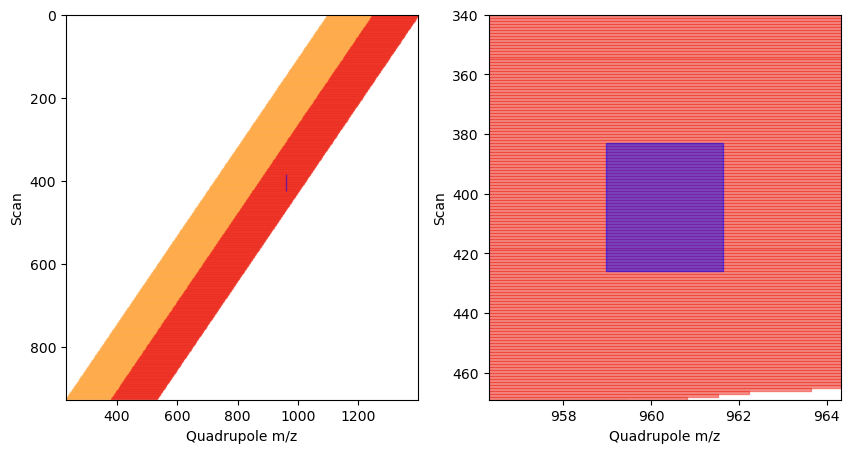

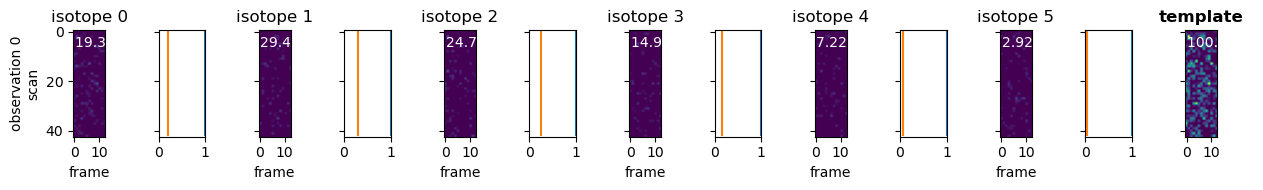

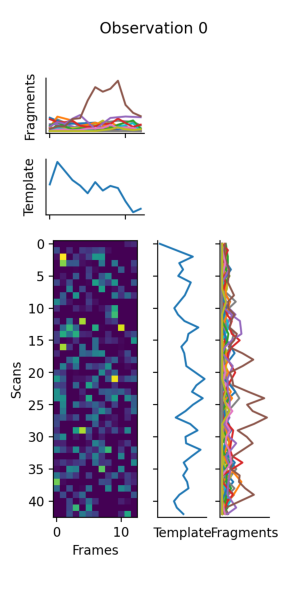

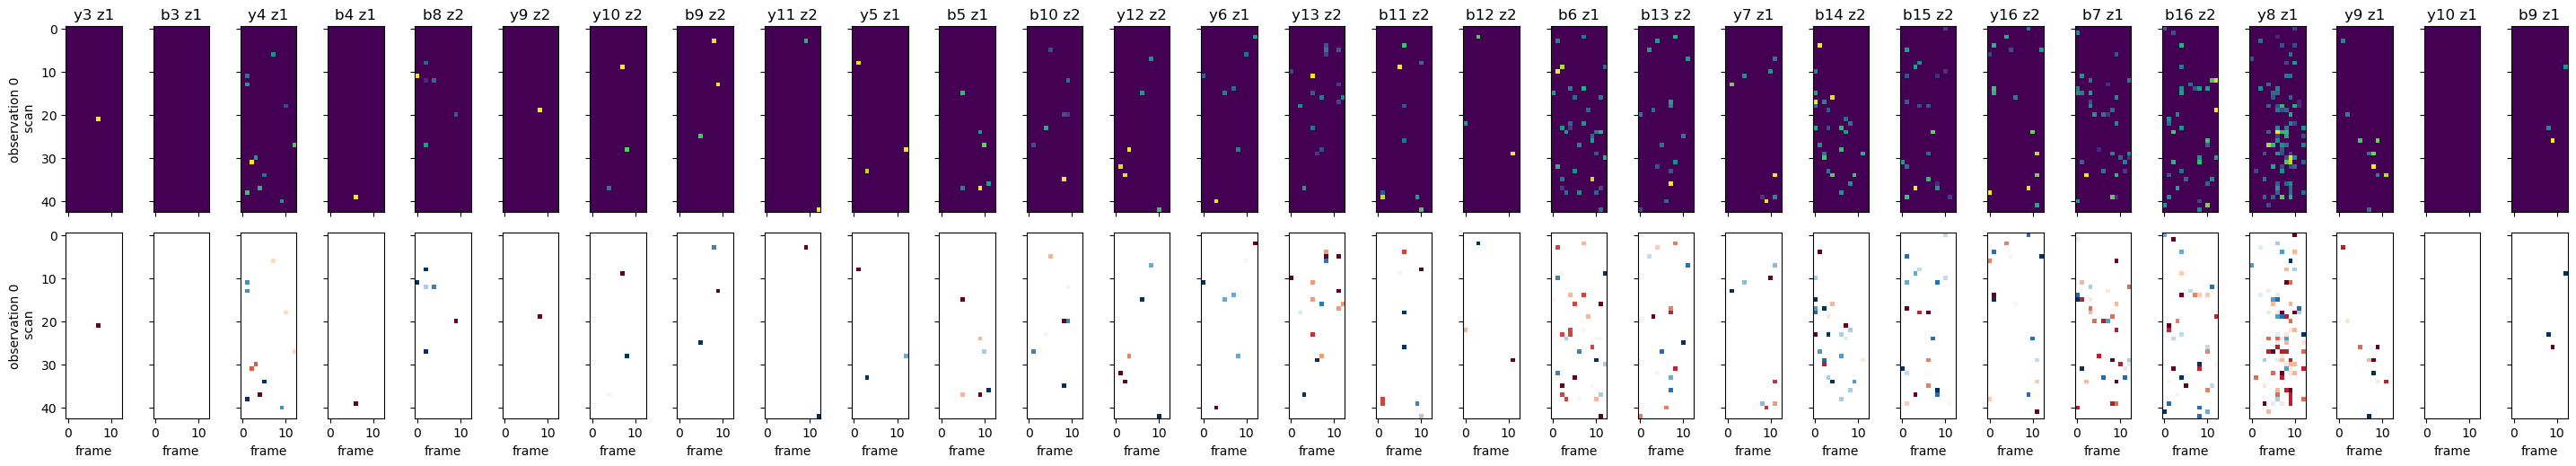

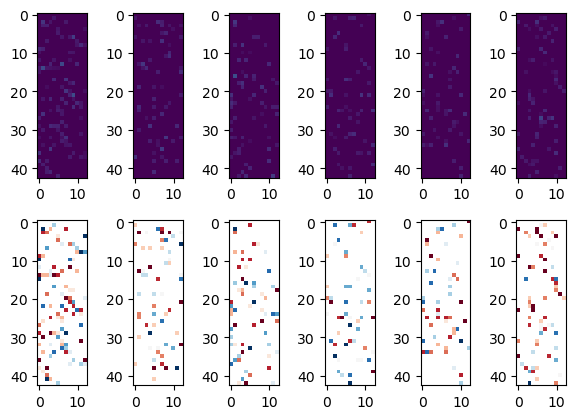

 10%|█         | 1/10 [00:05<00:50,  5.65s/it]

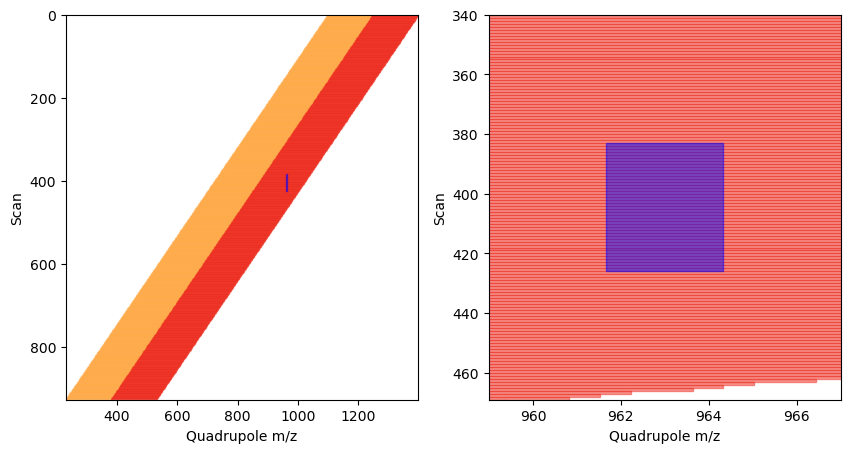

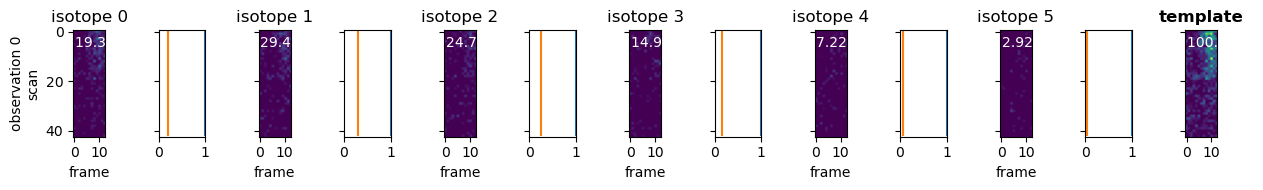

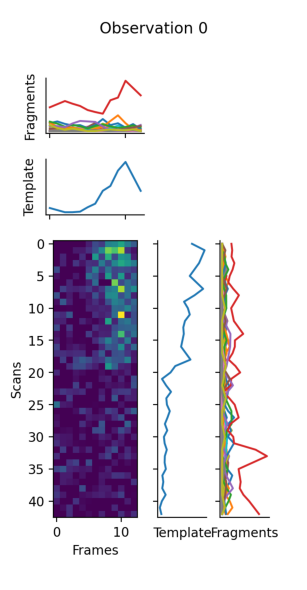

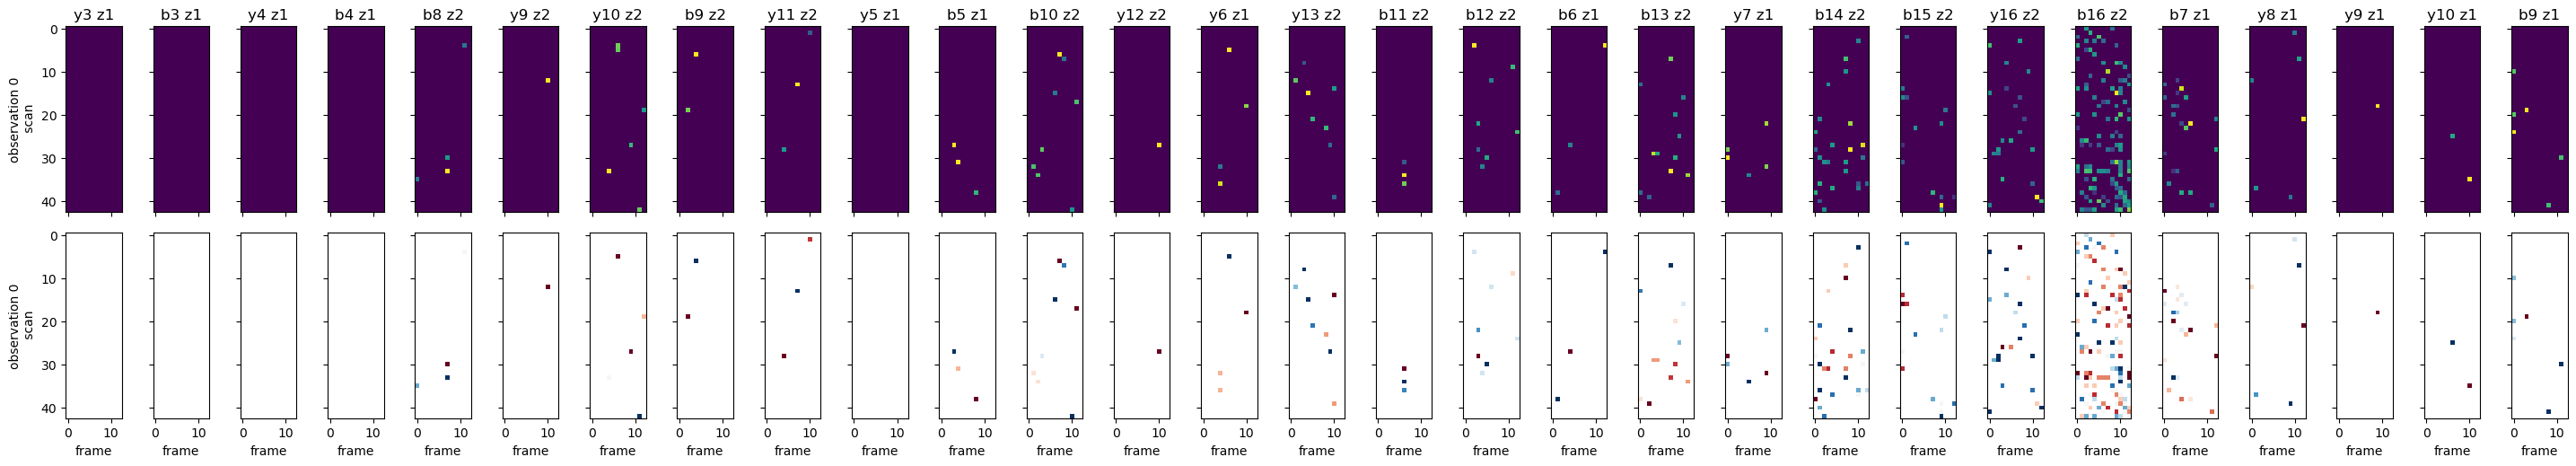

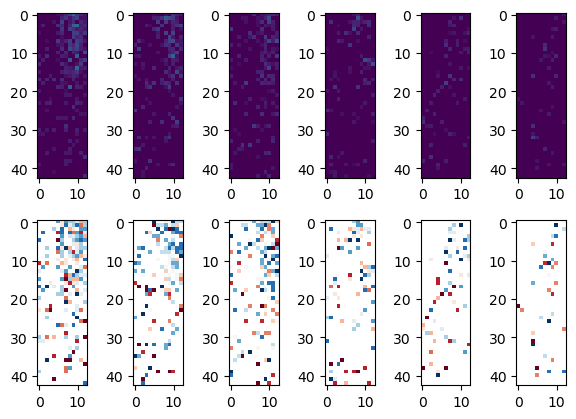

 20%|██        | 2/10 [00:10<00:40,  5.04s/it]

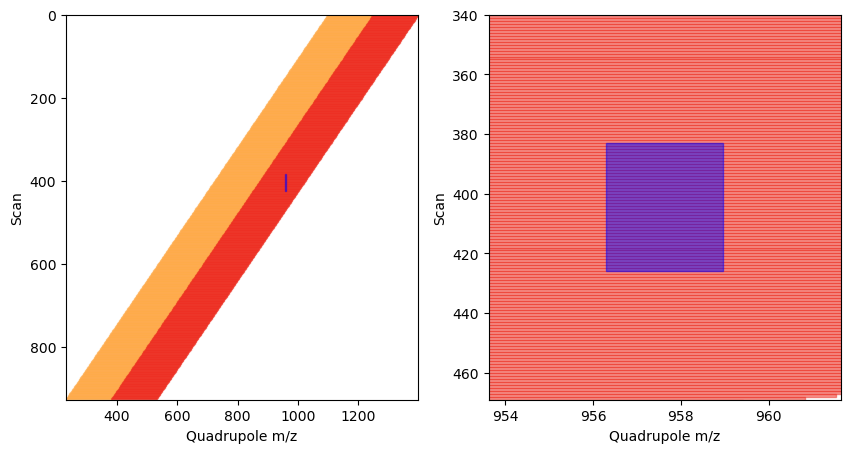

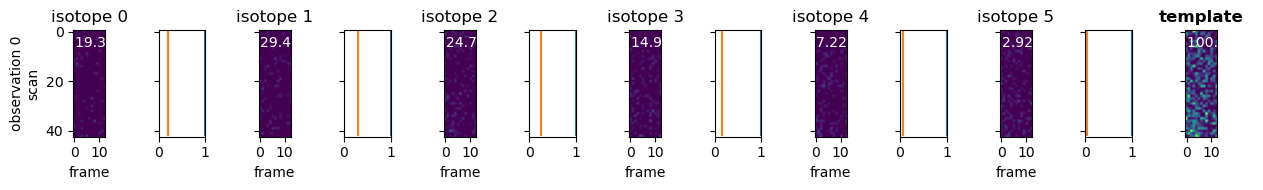

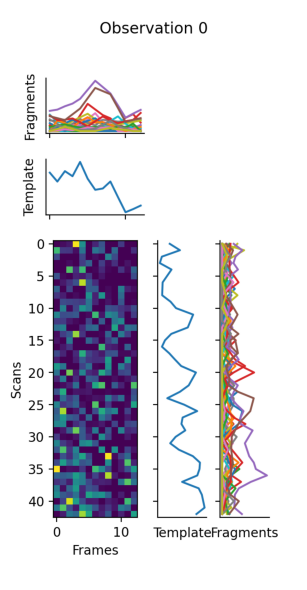

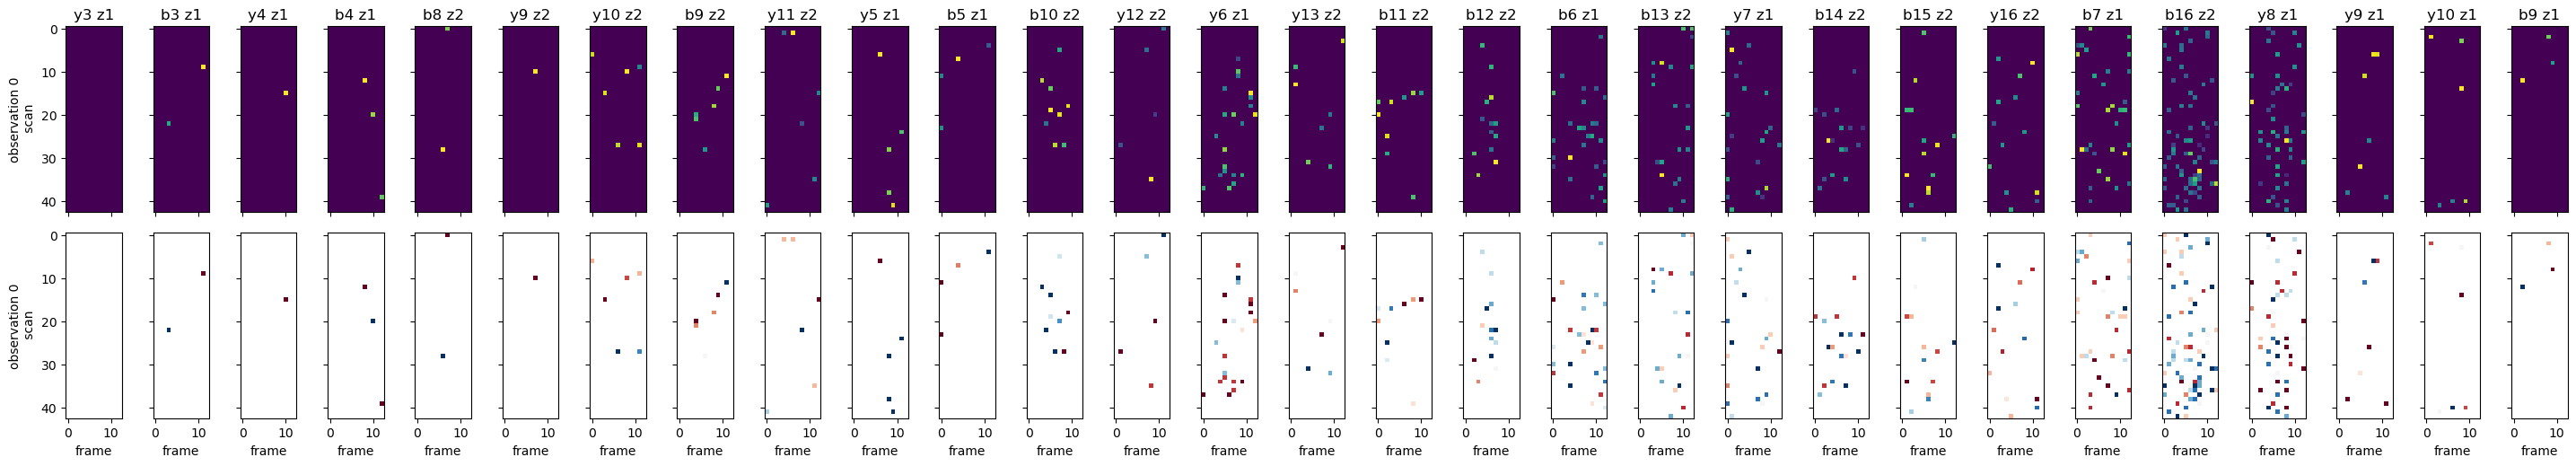

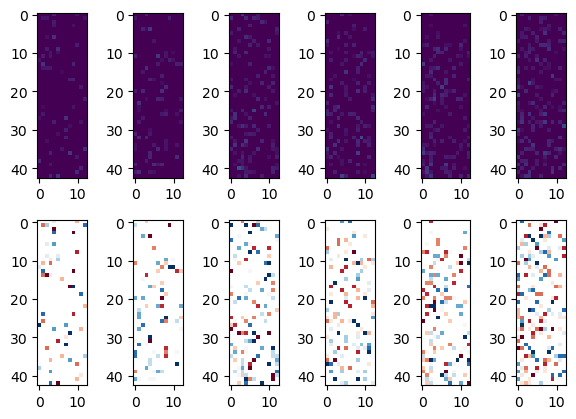

 30%|███       | 3/10 [00:15<00:37,  5.32s/it]

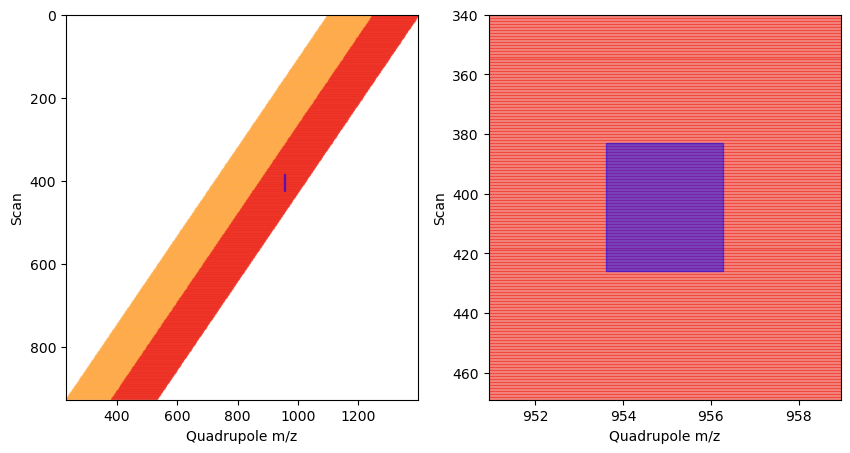

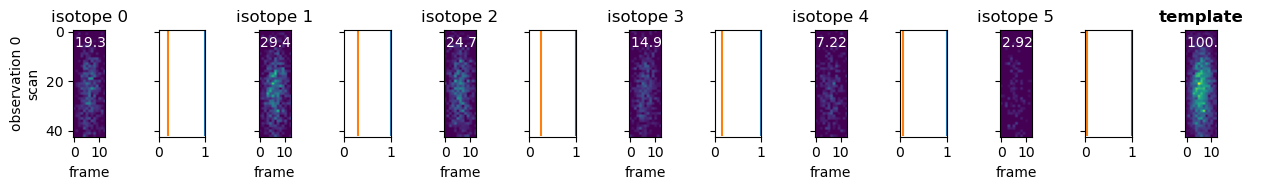

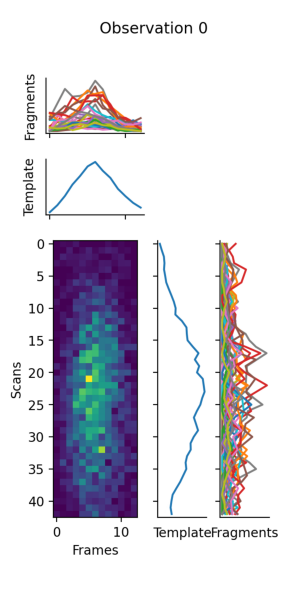

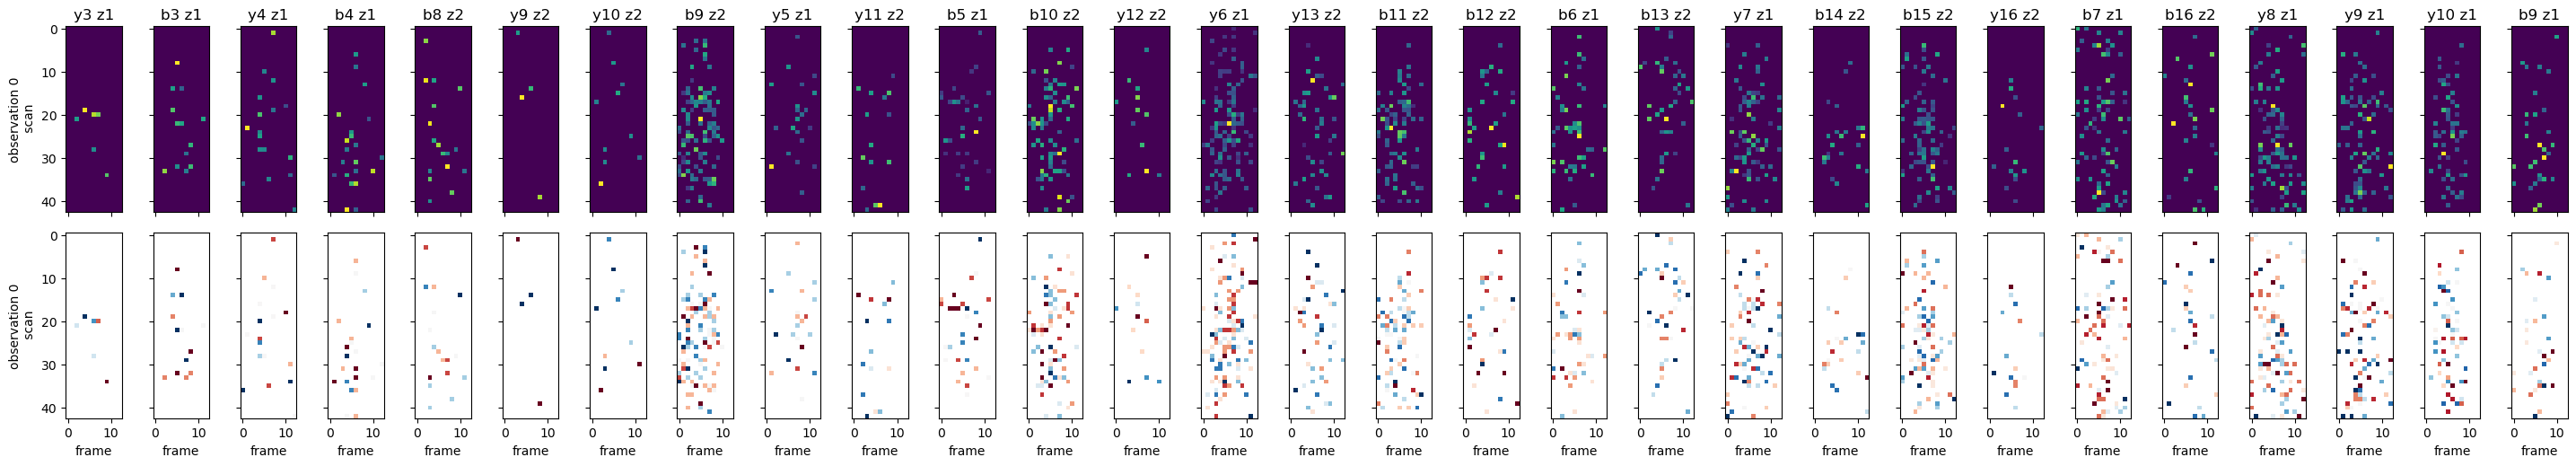

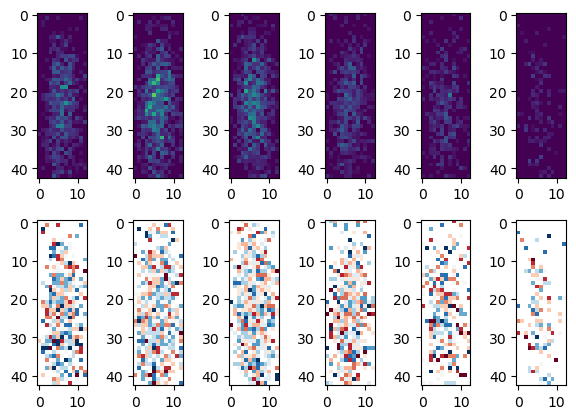

 40%|████      | 4/10 [00:20<00:30,  5.02s/it]

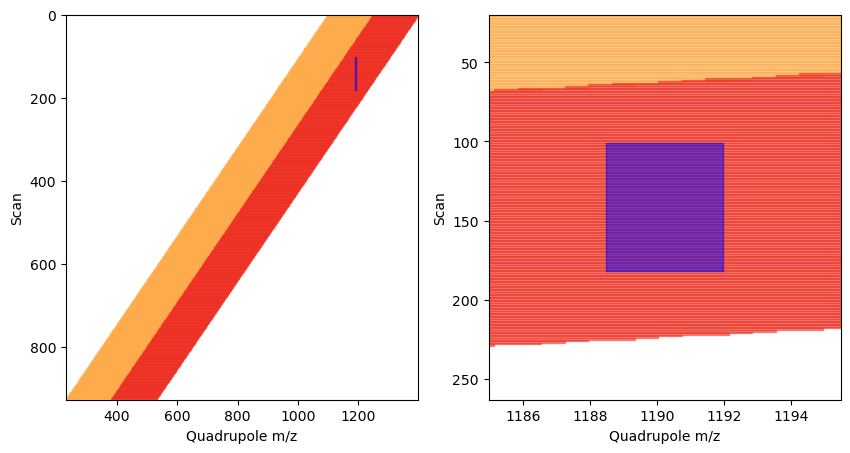

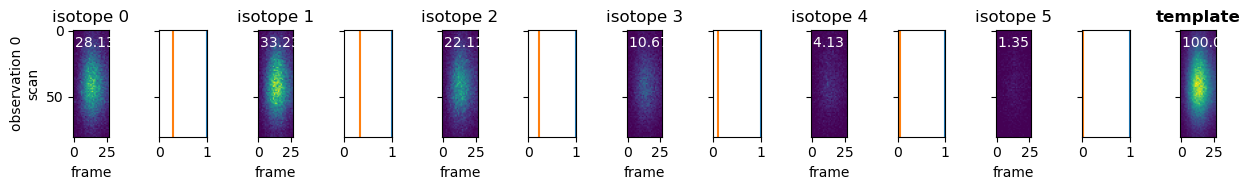

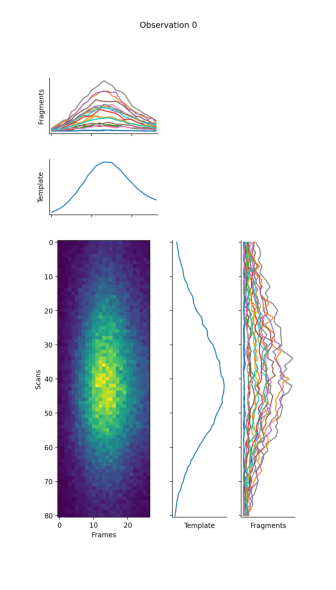

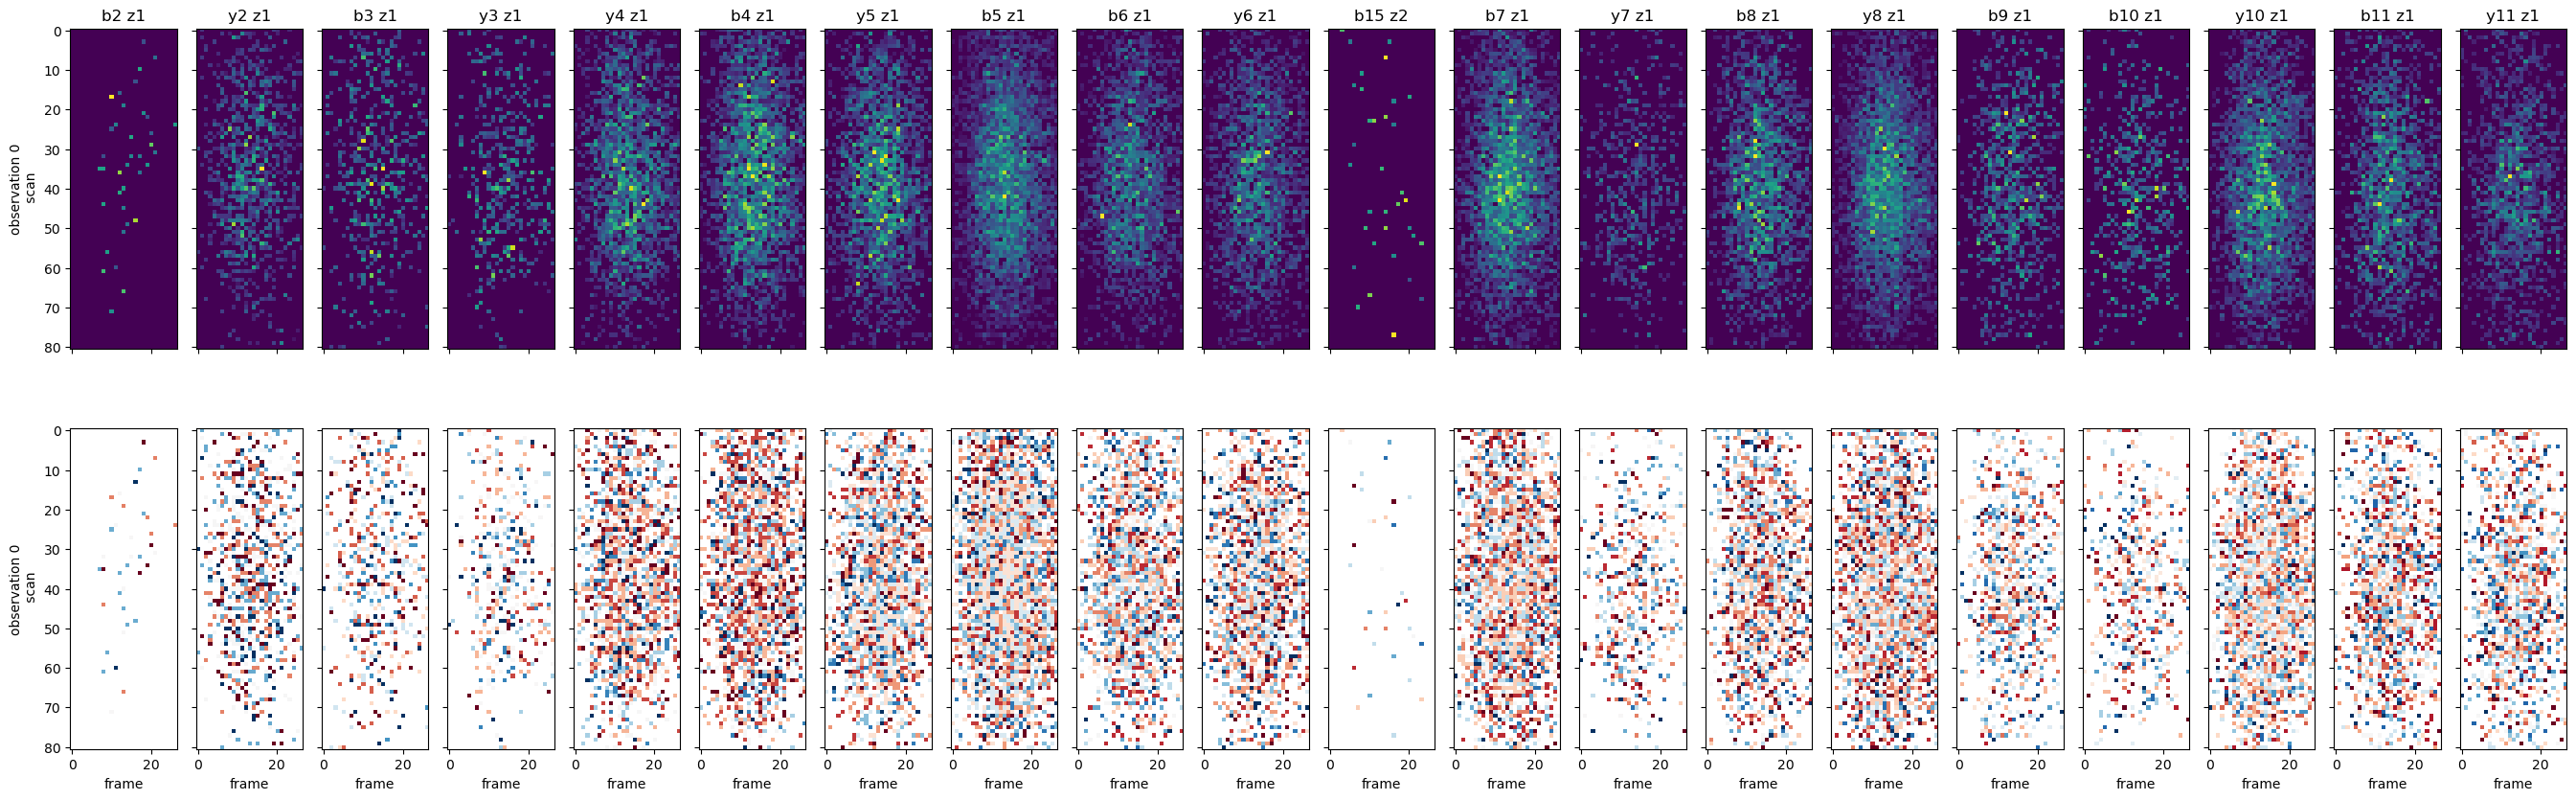

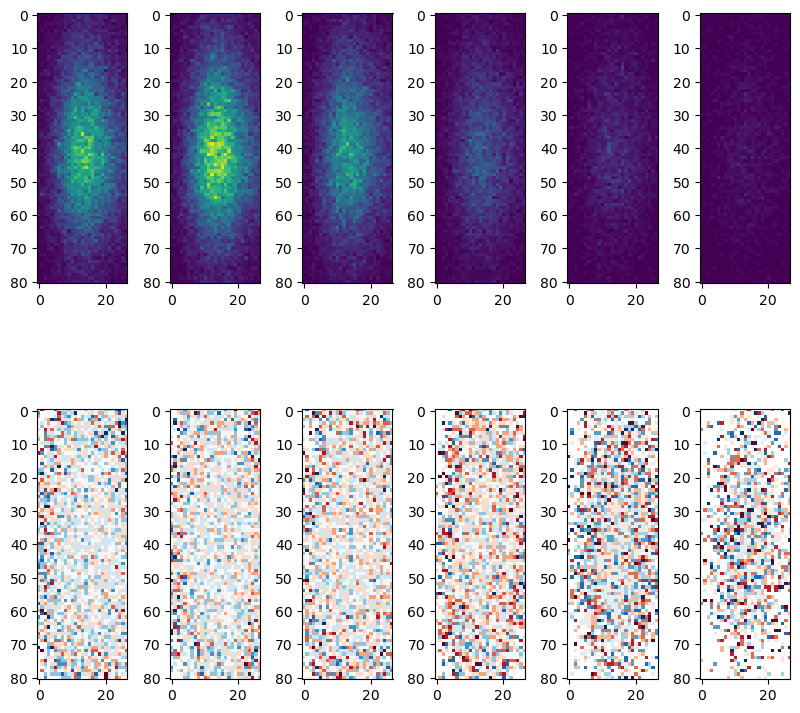

 50%|█████     | 5/10 [00:25<00:25,  5.13s/it]

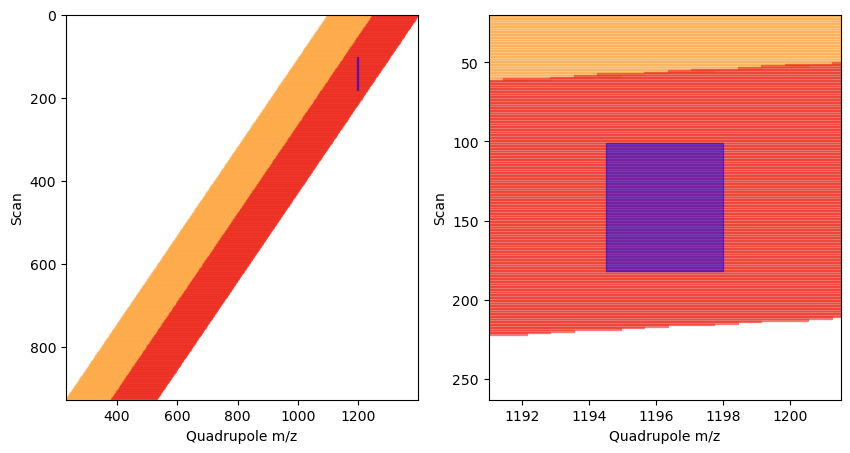

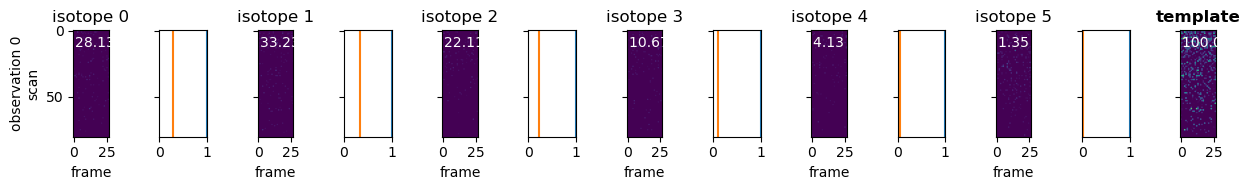

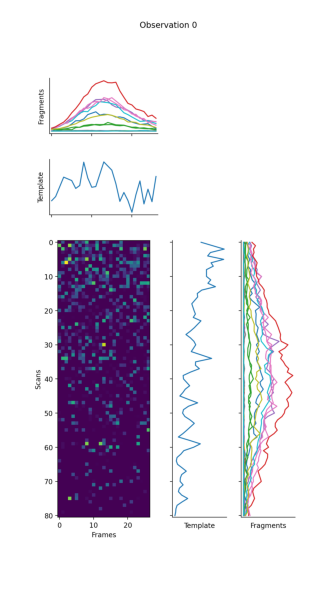

 50%|█████     | 5/10 [00:28<00:28,  5.68s/it]


KeyboardInterrupt: 

Done: <matplotlib.backends.backend_agg.RendererAgg object at 0x4b13d6190>

<Figure size 2700x910 with 40 Axes>

RuntimeError: functools.partial(<bound method FigureCanvasAgg.print_png of <matplotlib.backends.backend_agg.FigureCanvasAgg object at 0x4dd77e2b0>>, orientation='portrait') did not call Figure.draw, so no renderer is available

<Figure size 2700x910 with 40 Axes>

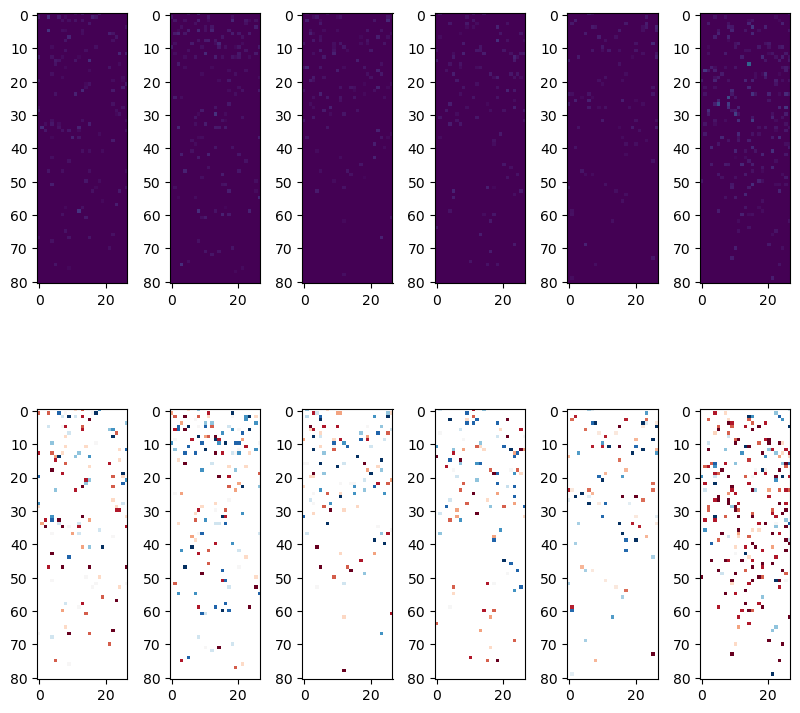

In [865]:
from alphadia.extraction.scoring import MS2ExtractionWorkflow
from alphadia.extraction import quadrupole

q = quadrupole.SimpleQuadrupole(dia_data.cycle)

scoring_workflow = MS2ExtractionWorkflow(
    dia_data,
    precursors_flat,
    fragments_flat,
    candidates_df,
    q,
    precursor_mz_tolerance=15,
    fragment_mz_tolerance=15,
    rt_column = f'rt_calibrated',
    mobility_column = f'mobility_calibrated',
    precursor_mz_column = f'mz_calibrated',
    fragment_mz_column = f'mz_calibrated',
    debug=True
)
container, psm, fragments = scoring_workflow()

In [49]:
container[0].

In [173]:
fragments_exclusive

mz_library  intensity  cardinality  type  loss_type  charge  number  \
0         628.377686   1.000000            4   121          0       1       6   
1         263.139008   0.015442            1    98          0       1       2   
2         541.345642   0.264511            4   121          0       1       5   
3         271.176453   0.030825            4   121          0       2       5   
4         345.224487   0.038848            4   121          0       1       3   
...              ...        ...          ...   ...        ...     ...     ...   
2909992  2087.022705   1.000000            1   121          0       1      18   
2909993  1985.974976   0.713498            1   121          0       1      17   
2909994  1928.953491   0.047048            1   121          0       1      16   
2909995  1829.885010   0.114307            1   121          0       1      15   
2909996  1714.858154   0.002081            1   121          0       1      14   

         position  mz_calibrated  
0               0       0.000000  
1               1     263.133179  
2               1       0.000000  
3               1       0.000000  
4               3       0.000000  
...           ...            ...  
2909992        28    2087.030518  
2909993        29    1985.981812  
2909994        30    1928.959717  
2909995        31    1829.890259  
2909996        32    1714.862305  

[2909997 rows x 9 columns]

  0%|          | 0/10 [00:00<?, ?it/s]

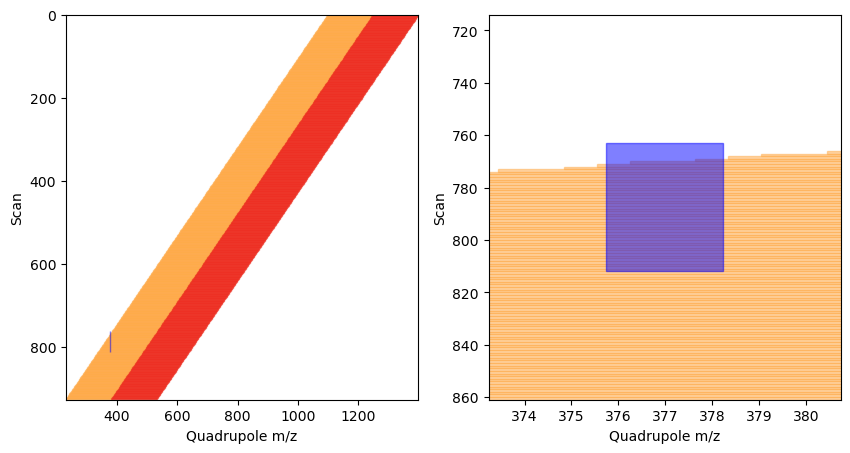

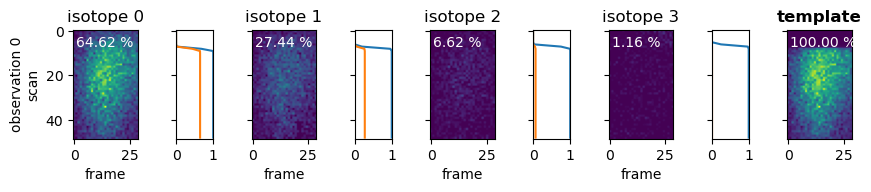

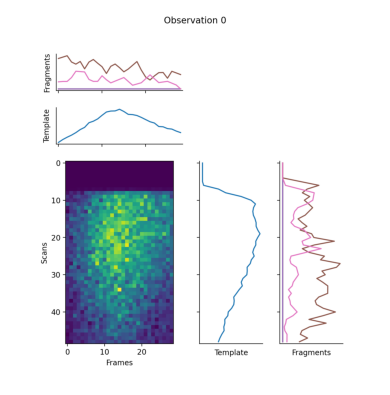

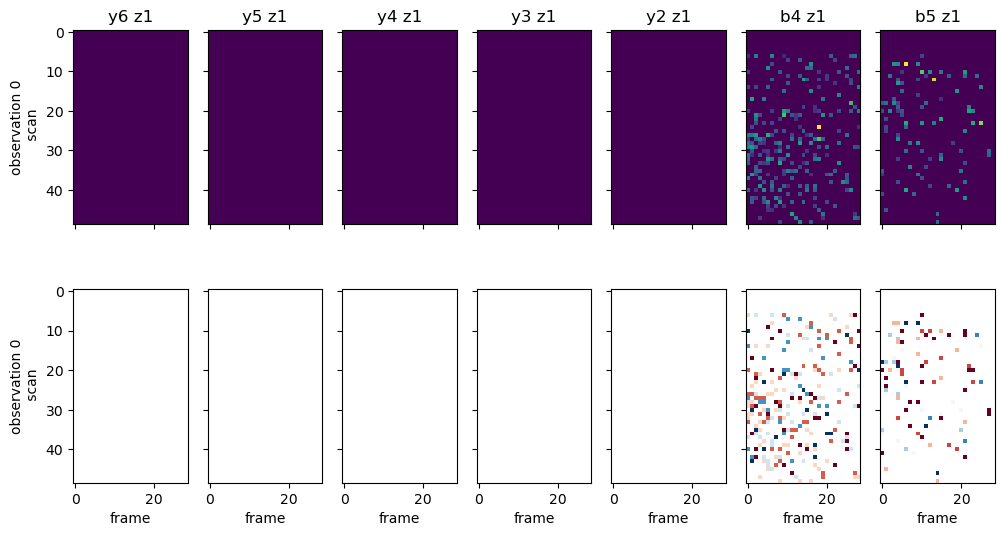

 10%|█         | 1/10 [00:03<00:29,  3.22s/it]

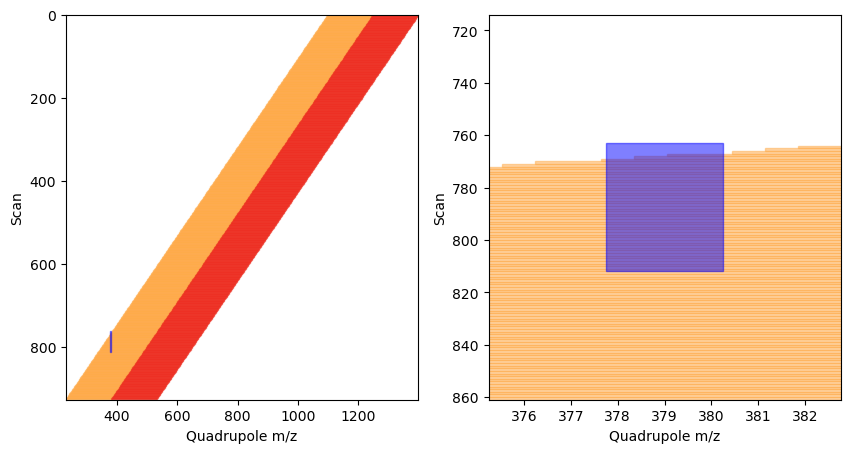

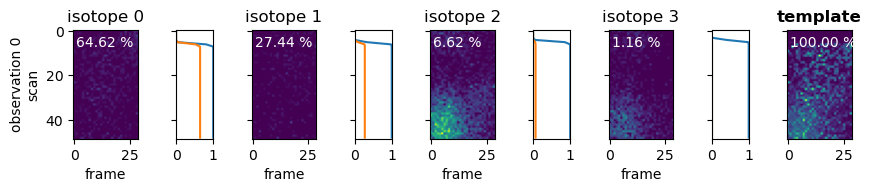

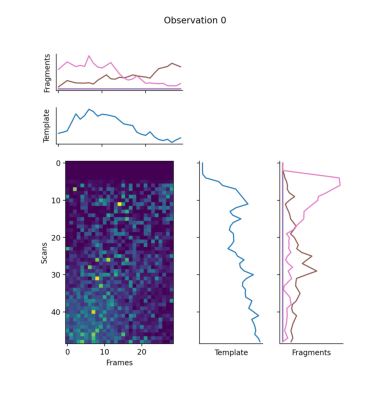

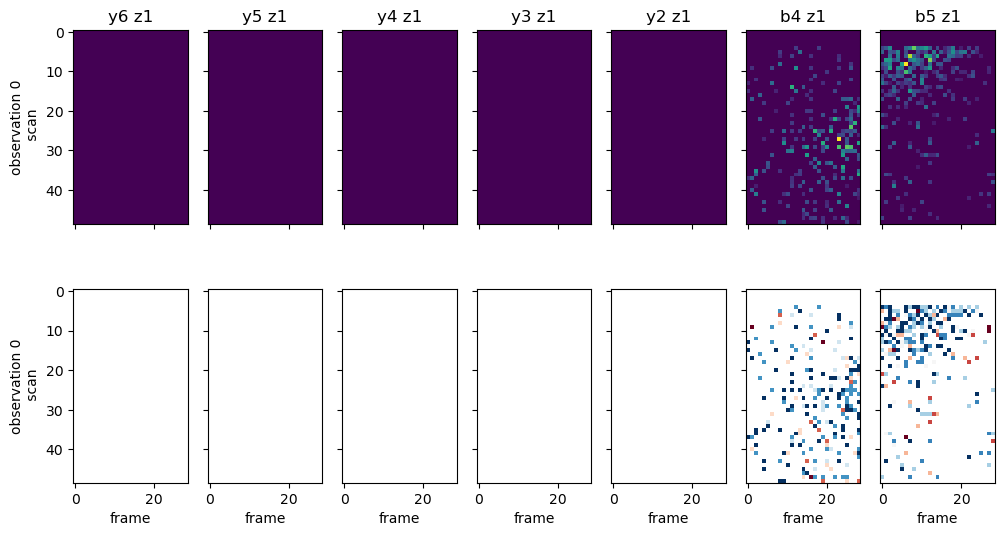

 20%|██        | 2/10 [00:06<00:26,  3.29s/it]

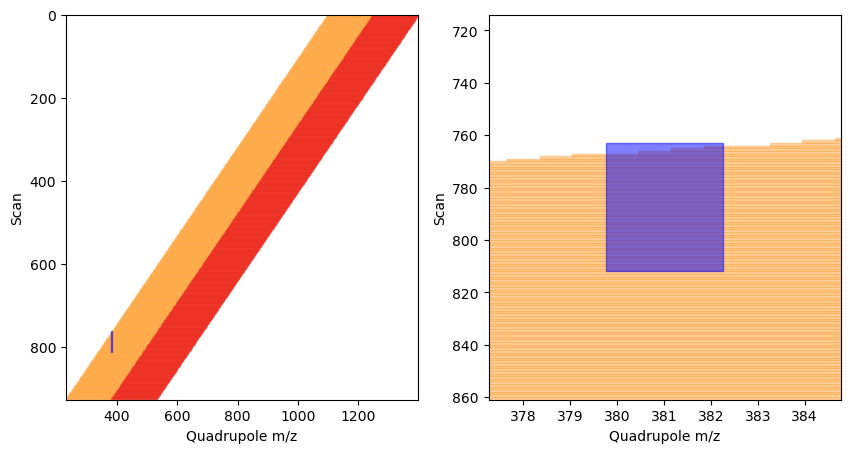

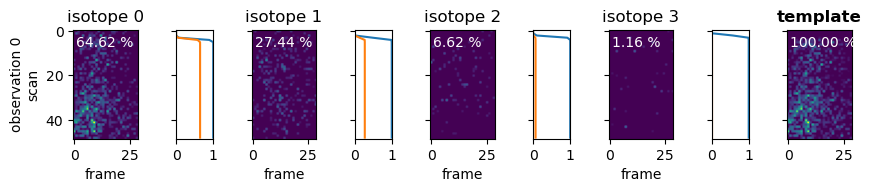

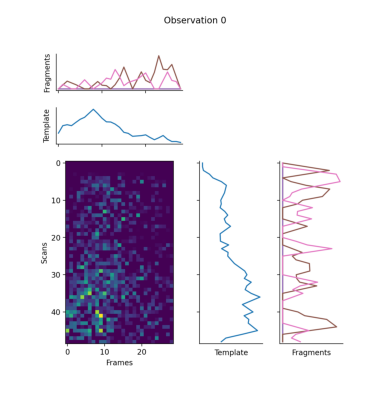

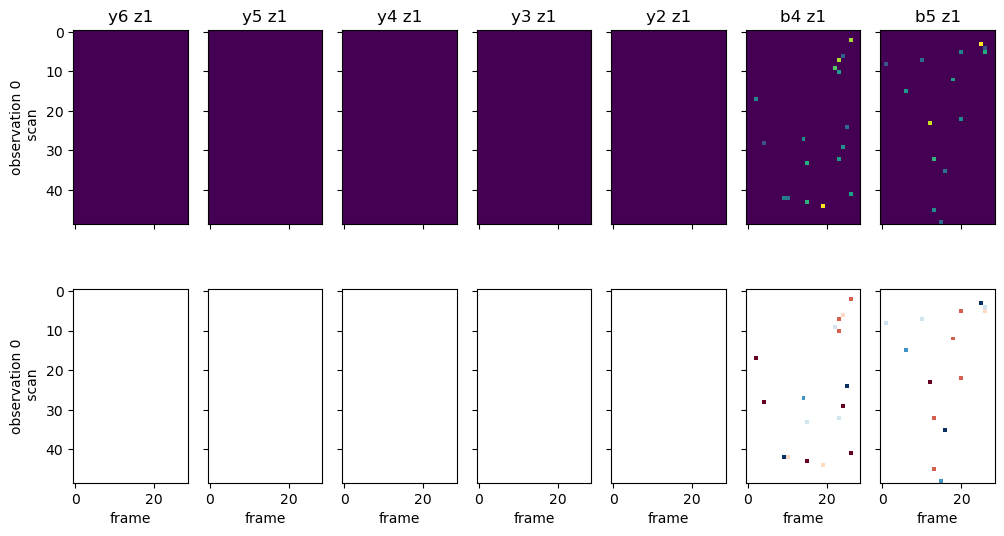

 30%|███       | 3/10 [00:09<00:20,  2.96s/it]

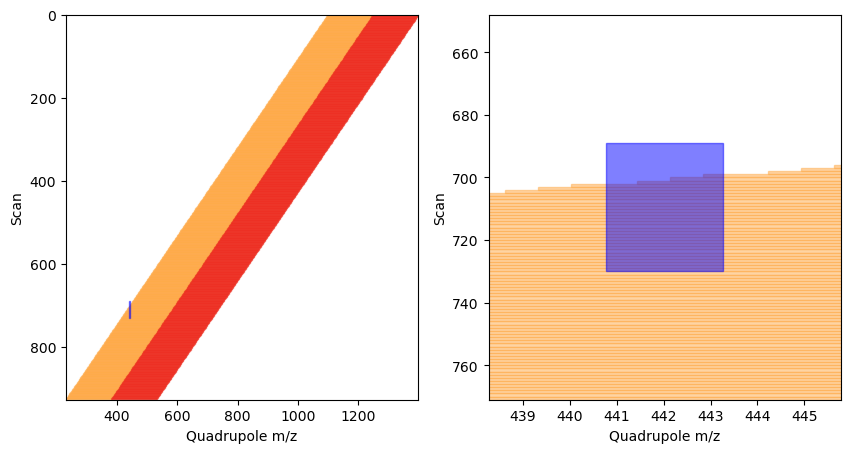

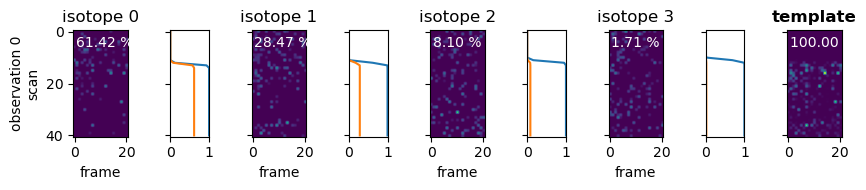

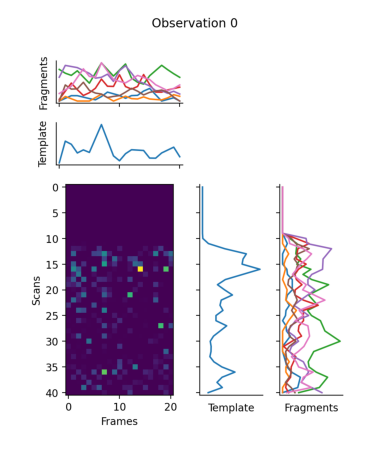

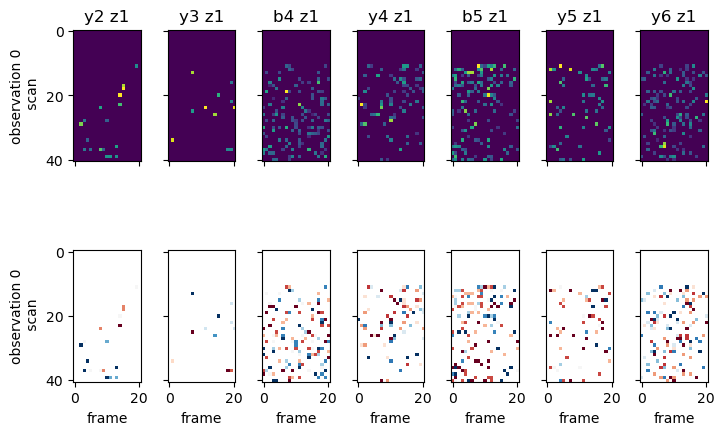

 40%|████      | 4/10 [00:12<00:18,  3.08s/it]

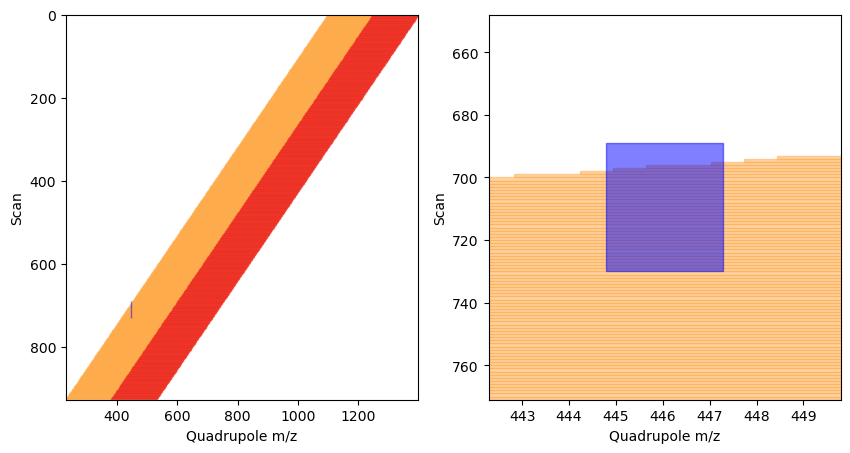

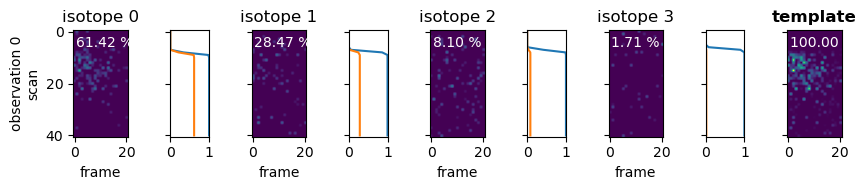

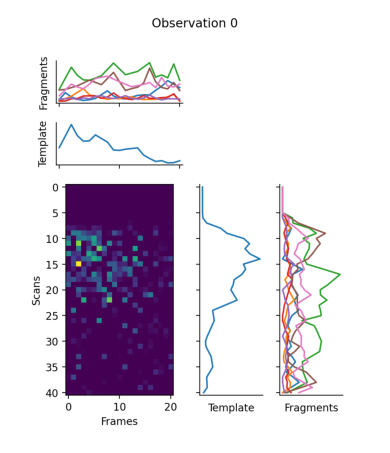

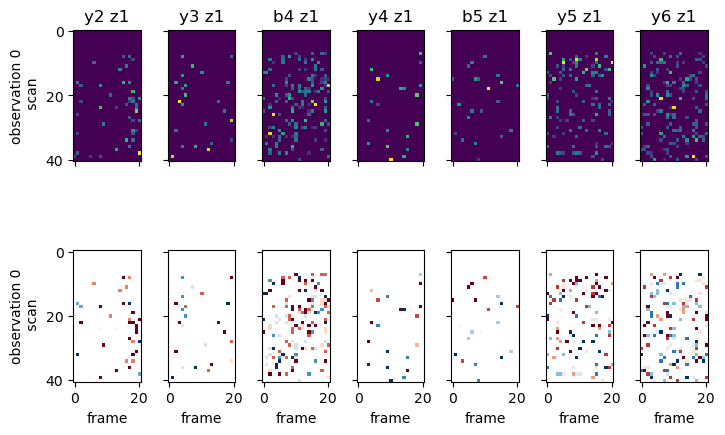

 50%|█████     | 5/10 [00:14<00:14,  2.85s/it]

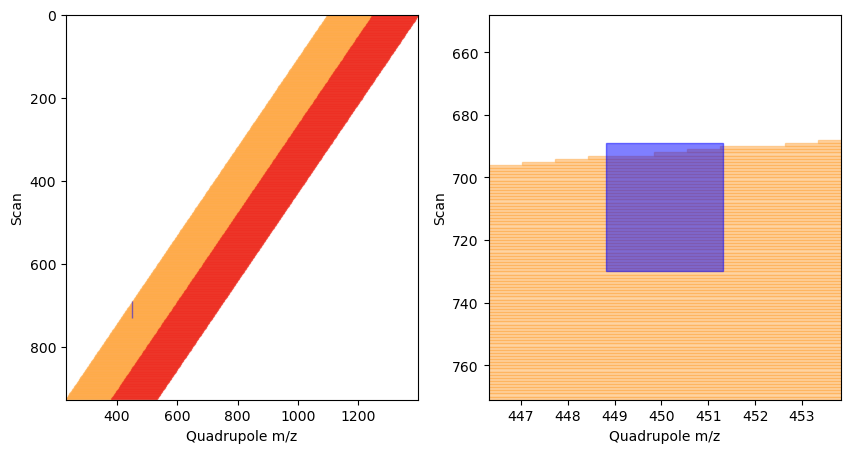

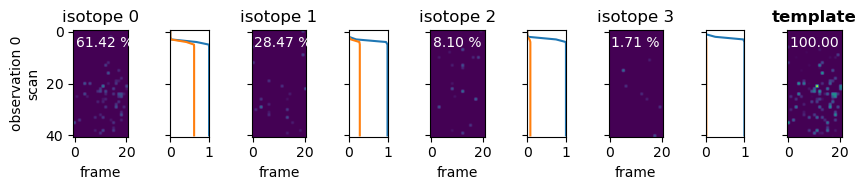

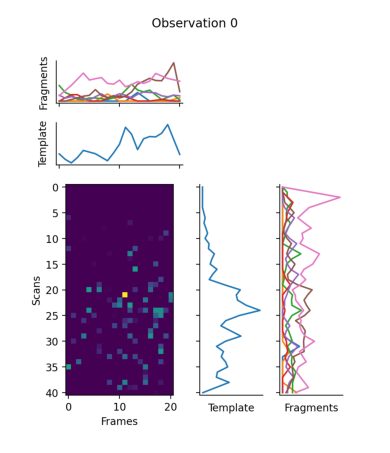

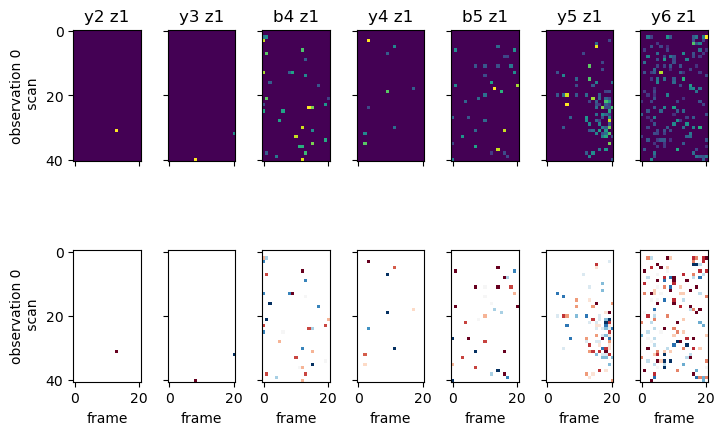

 60%|██████    | 6/10 [00:18<00:12,  3.01s/it]

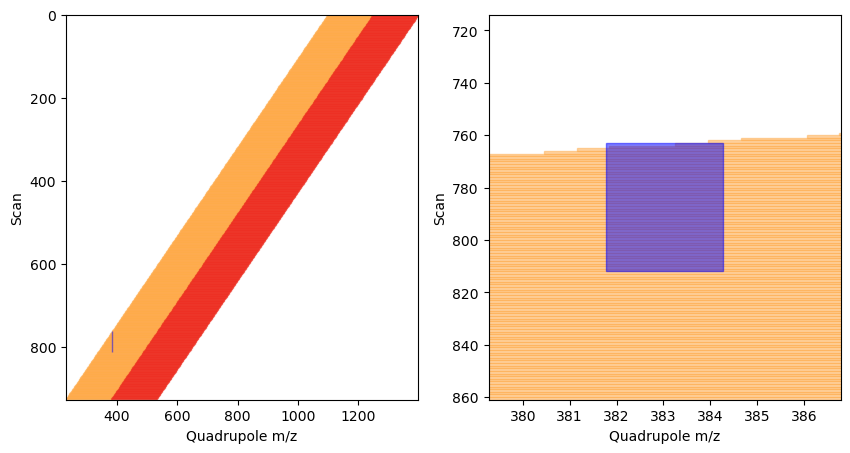

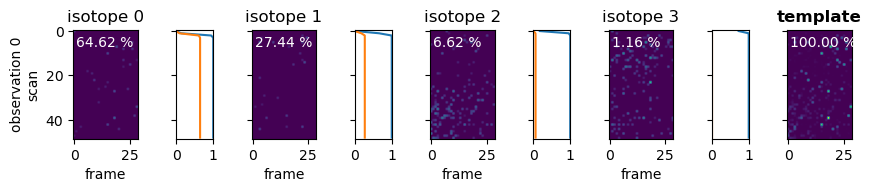

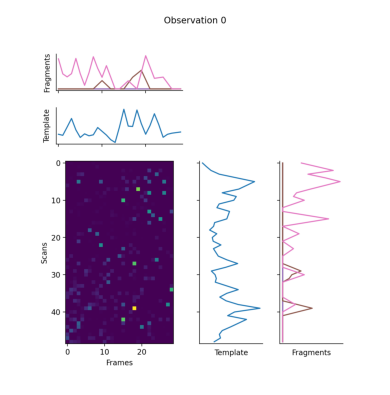

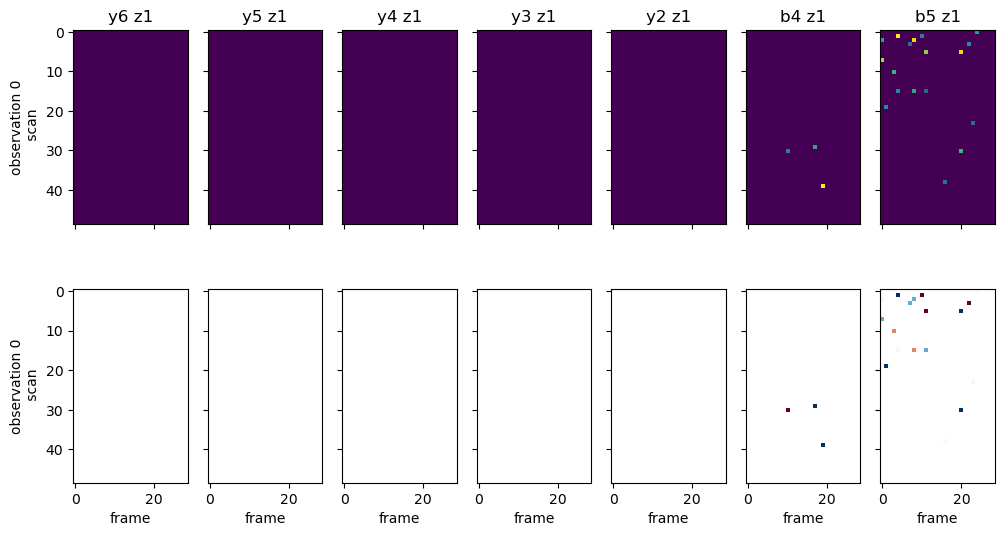

 70%|███████   | 7/10 [00:20<00:08,  2.86s/it]

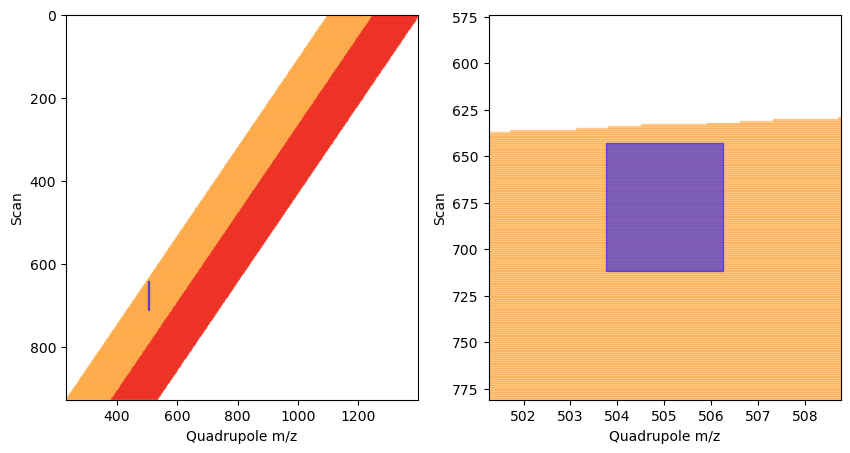

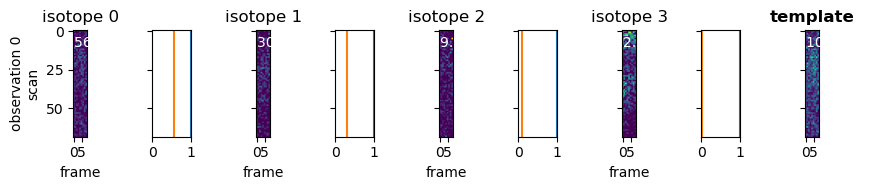

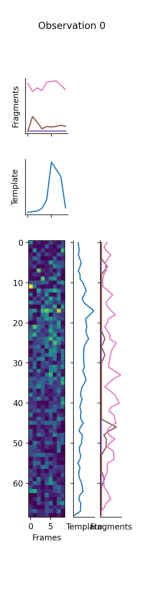

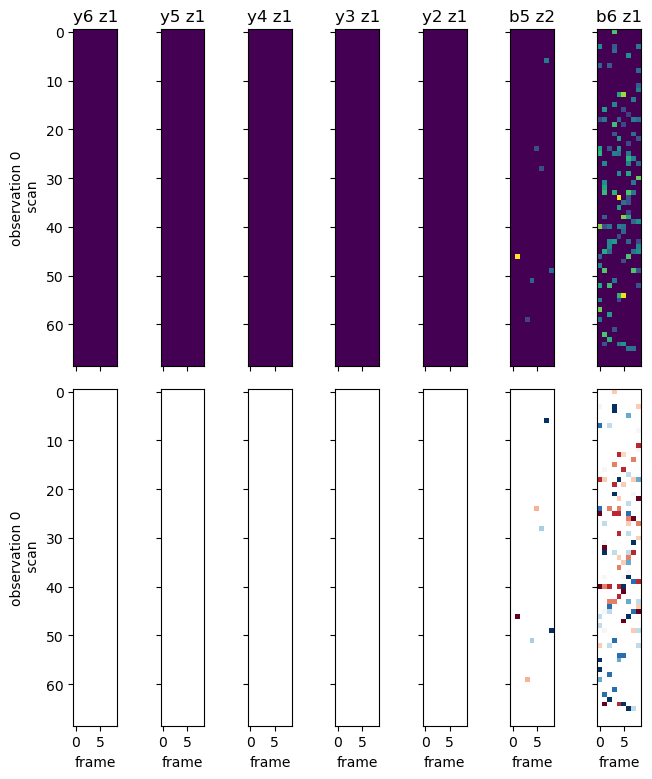

 80%|████████  | 8/10 [00:24<00:06,  3.01s/it]

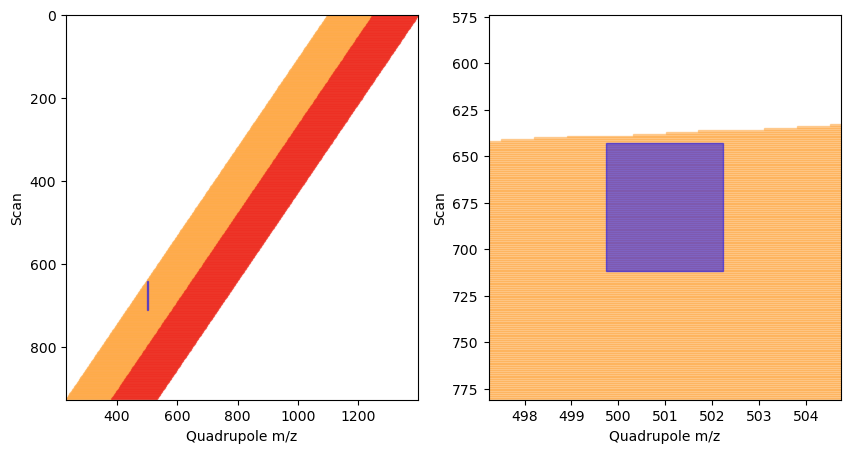

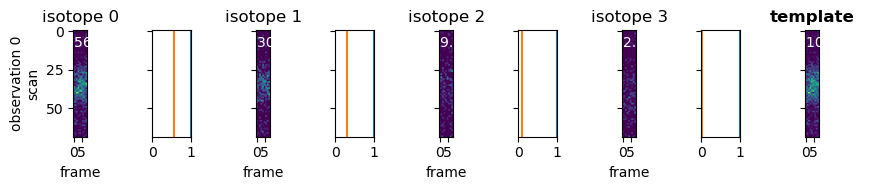

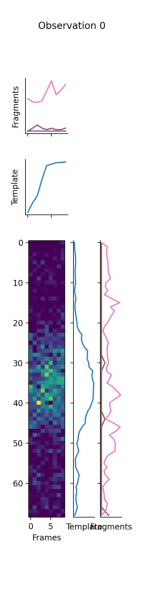

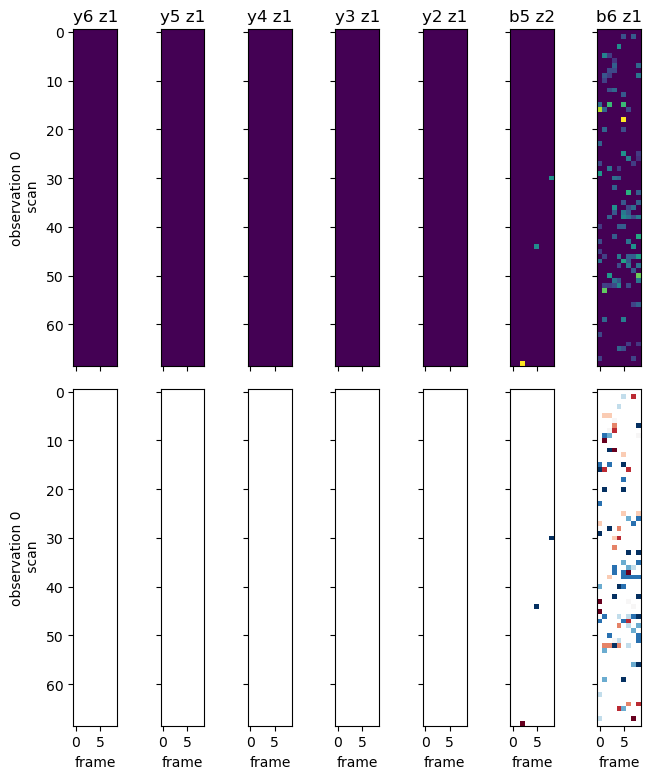

 90%|█████████ | 9/10 [00:27<00:03,  3.09s/it]

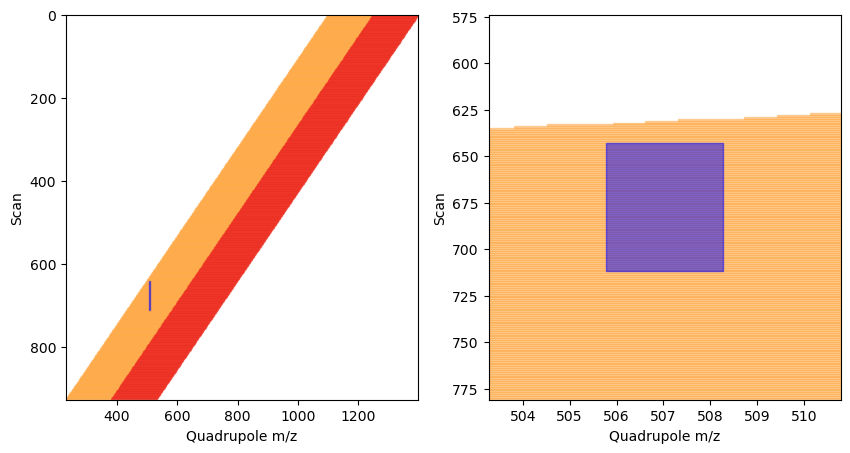

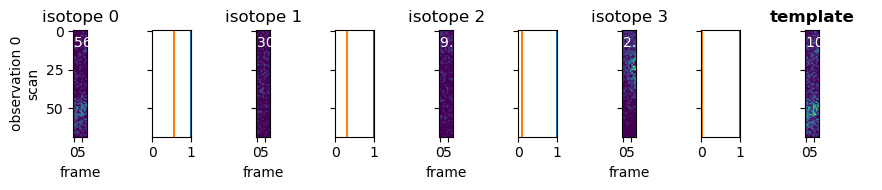

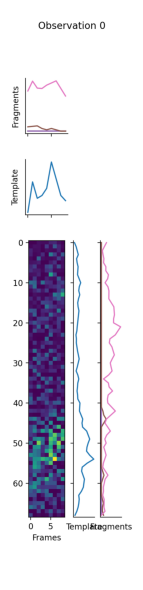

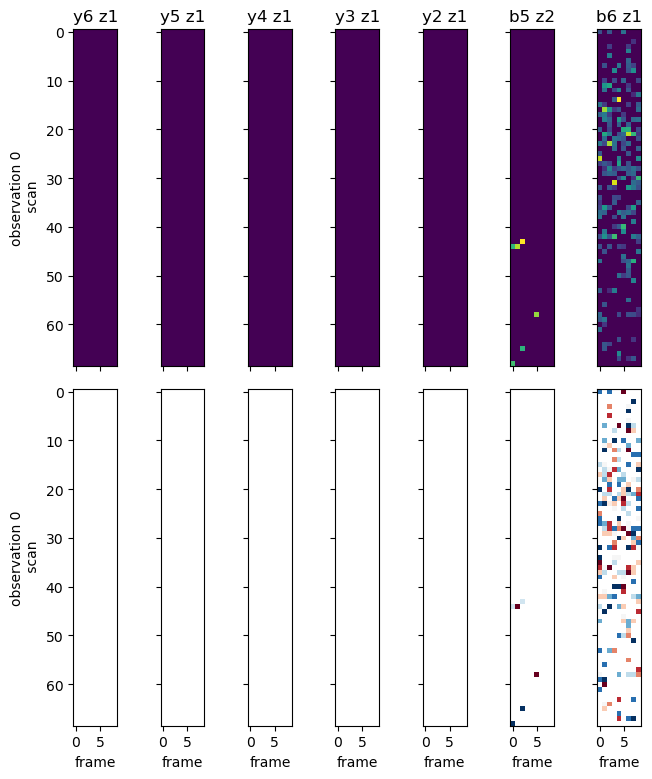

100%|██████████| 10/10 [00:29<00:00,  2.98s/it]


In [260]:
from alphadia.extraction.scoring import MS2ExtractionWorkflow
from alphadia.extraction import quadrupole

q = quadrupole.SimpleQuadrupole(dia_data.cycle)

scoring_workflow = MS2ExtractionWorkflow(
    dia_data,
    precursors_flat,
    fragments_exclusive,
    candidates_df,
    q,
    precursor_mz_tolerance=15,
    fragment_mz_tolerance=15,
    rt_column = f'rt_calibrated',
    mobility_column = f'mobility_calibrated',
    precursor_mz_column = f'mz_calibrated',
    fragment_mz_column = f'mz_calibrated',
    debug=True
)
psm = scoring_workflow()

In [233]:
psm_df, fragment_df = psm

In [241]:
psm_df.channel.value_counts()

0     27863
4     27735
8     27557
12    26642
Name: channel, dtype: int64

In [235]:
psm_df ['id'] = np.arange(len(psm_df))

In [236]:
psm_df = psm_df[(psm_df['decoy'] == 0) | (psm_df['channel'] == 12)].copy()

In [238]:
psm_df.loc[psm_df['channel'] == 12, 'decoy'] = 1

In [231]:
psm_df.replace([np.inf, -np.inf], np.nan, inplace=True)
psm_df.dropna(how="all", inplace=True)

In [225]:
psm_df = psm_df.dropna().reset_index(drop=True).copy()
print(len(psm_df))

57868


In [232]:
# calculate the number of NA values per column
for c in psm_df.columns:
    print(c, psm_df[c].isna().sum())

precursor_idx 0
elution_group_idx 0
charge 0
rank 0
scan_start 0
scan_stop 0
scan_center 0
frame_start 0
frame_stop 0
frame_center 0
precursor_mass_error 0
mz_library 0
mz_observed 0
precursor_isotope_correlation 0
sum_precursor_intensity 0
n_fragments_matched 0
n_fragments 0
fraction_fragments 0
intensity_correlation 0
sum_fragment_intensity 0
mean_fragment_intensity 0
mean_fragment_nonzero 0
n_observations 0
mean_observation_score 0
var_observation_score 0
fragment_coverage 0
fragment_scan_correlation 0
fragment_frame_correlation 0
template_scan_correlation 0
template_frame_correlation 0
fwhm_rt 0
fwhm_mobility 0
sum_b_ion_intensity 0
sum_y_ion_intensity 0
observed_difference_b_y 0
expected_difference_b_y 51929
aggreement_b_y 51929
base_width_mobility 0
base_width_rt 0
rt_observed 0
mobility_observed 0
decoy 0
mz_calibrated 0
rt_library 0
rt_calibrated 0
rt_error 0
mobility_library 0
mobility_calibrated 0
mobility_error 0
proteins 0
channel 0
id 0


54505


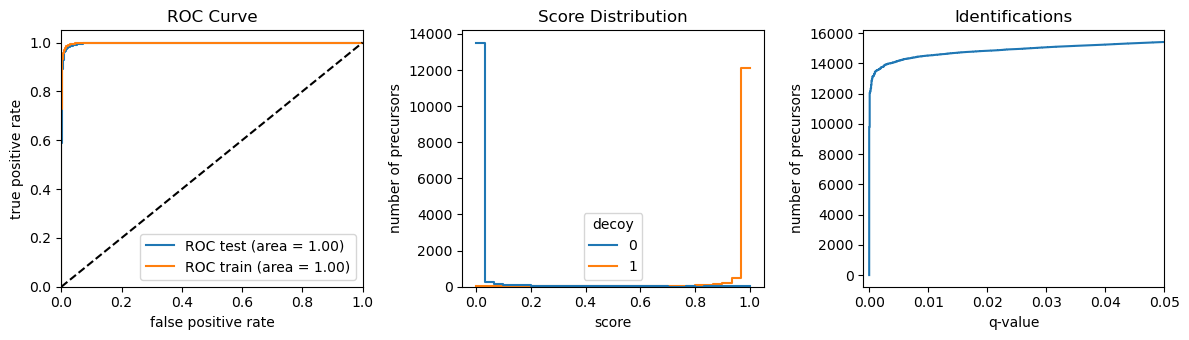

28596
(14384, 54)
3174
54377


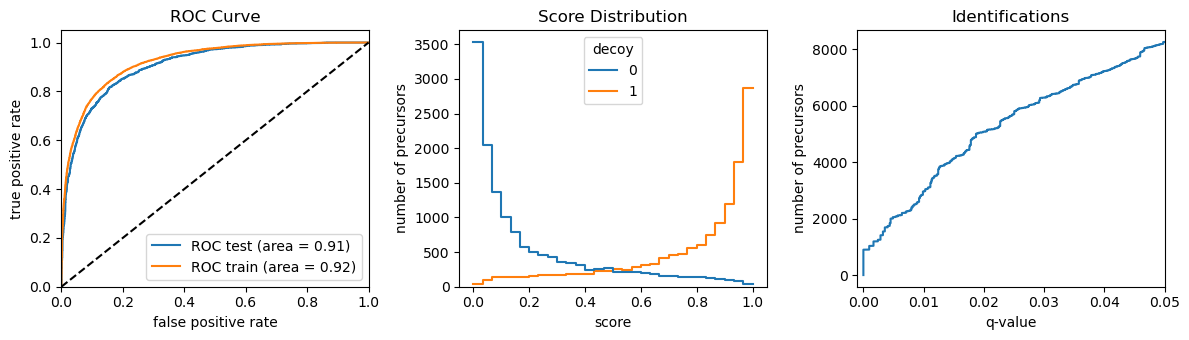

28511
(2934, 54)
1225
54199


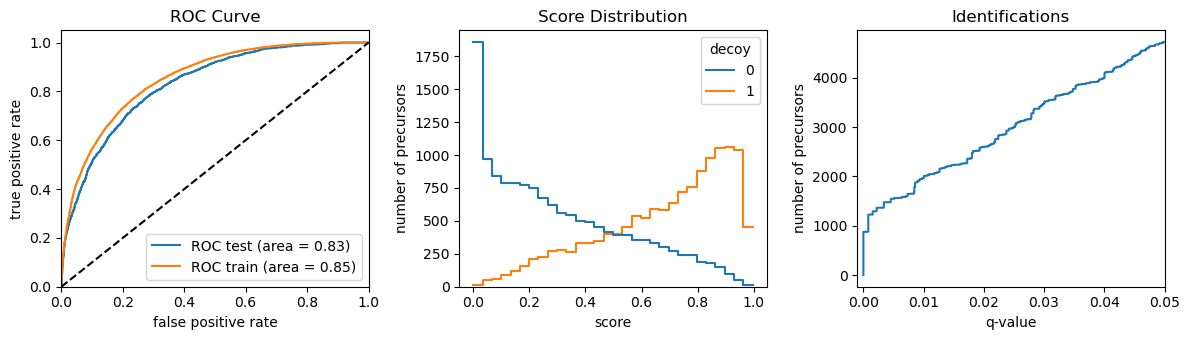

28388
(1948, 54)
818


In [240]:
from alphadia.extraction.scoring import fdr_correction

for channel in [0,4,8]:
    channel_psm_df = psm_df[psm_df['channel'].isin([channel, 12])]
    print(len(channel_psm_df))
    channel_psm_df = fdr_correction(channel_psm_df, index_group='id')
    print(len(channel_psm_df))
    print(channel_psm_df[(channel_psm_df['qval'] <= 0.01) & (channel_psm_df['decoy'] == 0)].shape)
    print(channel_psm_df[(channel_psm_df['qval'] <= 0.01) & (channel_psm_df['decoy'] == 0)]['proteins'].nunique())

In [75]:
d4_df_sig['proteins'].nunique()

1529

In [10]:
import time

performance = []

for mobility_window in [0.02, 0.03, 0.04, 0.05]:
    for rt_window in [10, 20, 30, 45, 60, 90, 120, 150, 180, 200, 250]:

        for i in range(10):

            config = hybridselection.HybridCandidateConfig()
            config.update({
                'rt_tolerance': rt_window,
                'mz_tolerance': 10.,
                'mobility_tolerance': mobility_window,
                'sigma_scale_rt': 0.5,
                'sigma_scale_mobility': 0.8,
                'f_mobility': 1.0,
                'f_rt': 0.95,
                'center_fraction': 0.01,
                'min_size_rt': 3,
                'candidate_count':3
            })

            start_time = time.time()
            selection = hybridselection.HybridCandidateSelection(
                dia_data,
                precursors_flat.sample(1000),
                fragments_flat,
                config.jitclass(),
                rt_tolerance=80,
                mz_tolerance=15,
                mobility_tolerance=0.05,
                candidate_count=1,
                thread_count=10,
                debug=False,
                group_channels=False,
                top_k_precursors=3,
                top_k_fragments=12,
                rt_column='rt_calibrated',
                precursor_mz_column='mz_calibrated',
                fragment_mz_column='mz_library',
                mobility_column='mobility_calibrated'
            )
            candidates = selection()
            stop_time = time.time()

            performance.append({
                'mobility_window': mobility_window,
                'rt_window': rt_window,
                'duration': stop_time - start_time
            })

0:17:21.478089  INFO: Duty cycle consists of 13 frames, 1.39 seconds cycle time
0:17:21.478498  INFO: Duty cycle consists of 928 scans, 0.00065 1/K_0 resolution
0:17:21.478738  INFO: Expected peak length in RT is 10.00 seconds, sigma is 1.80
0:17:21.478967  INFO: Expected peak length in mobility is 0.03 1/K_0, sigma is 18.56
100%|██████████| 999/999 [00:00<00:00, 8618.98it/s]
0:17:22.089936  INFO: Duty cycle consists of 13 frames, 1.39 seconds cycle time
0:17:22.090487  INFO: Duty cycle consists of 928 scans, 0.00065 1/K_0 resolution
0:17:22.090732  INFO: Expected peak length in RT is 10.00 seconds, sigma is 1.80
0:17:22.090960  INFO: Expected peak length in mobility is 0.03 1/K_0, sigma is 18.56
100%|██████████| 999/999 [00:00<00:00, 10741.94it/s]
0:17:22.487150  INFO: Duty cycle consists of 13 frames, 1.39 seconds cycle time
0:17:22.487524  INFO: Duty cycle consists of 928 scans, 0.00065 1/K_0 resolution
0:17:22.487759  INFO: Expected peak length in RT is 10.00 seconds, sigma is 1.80

In [17]:
performance_df = pd.DataFrame(performance)
path = '/Users/georgwallmann/Library/CloudStorage/OneDrive-Personal/Studium/MPI/AG Mann/alphaDIA/slide_decks/2023_04_18_Borgwardt_Symposium/raw_data'

performance_df.to_csv(os.path.join(path, 'performance.tsv'), index=False, sep='\t')


In [22]:
performance_df['it/s'] = 1000 / performance_df['duration']
performance_df['mobility_window'] = performance_df['mobility_window']*2
performance_df['rt_window'] = performance_df['rt_window']*2

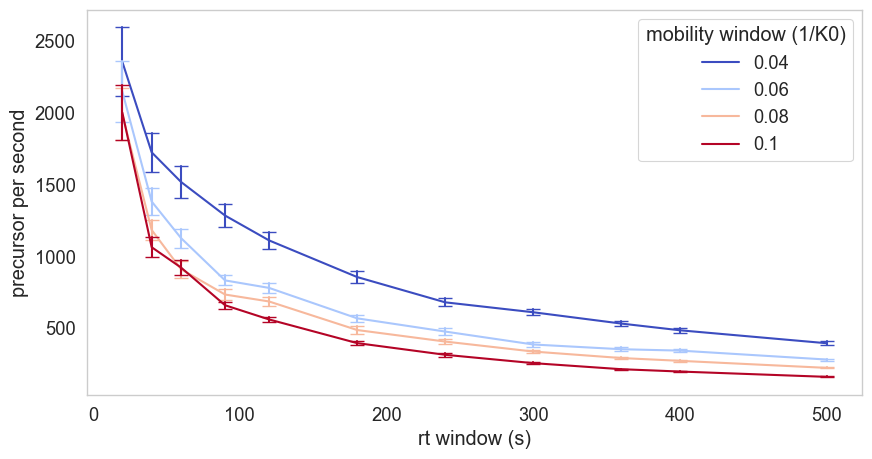

In [42]:
# plot the datapoints with error bars in seaborn
# remove the grid style
sns.set_style("whitegrid", {'axes.grid' : False})
fig, ax = plt.subplots(figsize=(10, 5))
sns.lineplot(
    data=performance_df,
    x="rt_window",
    y="it/s",
    hue="mobility_window",
    err_style="bars", 
    errorbar=("se", 2),
    err_kws={'capsize':5},
    palette='coolwarm'
)
ax.set_xlabel('rt window (s)')
ax.set_ylabel('precursor per second')
plt.legend(title='mobility window (1/K0)')

fig.savefig(os.path.join(path, 'performance.png'), bbox_inches='tight', dpi=300)


In [15]:
size = 256*128
mflops = 4500

In [16]:
2*mflops/(5*size*np.log2(size))

0.003662109375

In [59]:
gaussian_filter = hybridselection.GaussianFilter(
            dia_data,
            kernel_size=20
        )

4:24:13.931934  INFO: Duty cycle consists of 13 frames, 1.39 seconds cycle time
4:24:13.932534  INFO: Duty cycle consists of 928 scans, 0.00065 1/K_0 resolution
4:24:13.932885  INFO: Expected peak length in RT is 10.00 seconds, sigma is 3.61
4:24:13.933089  INFO: Expected peak length in mobility is 0.03 1/K_0, sigma is 23.20


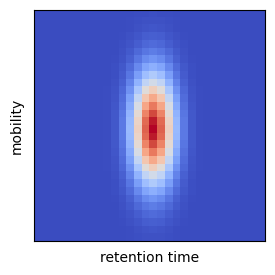

In [67]:


kernel = gaussian_filter.get_kernel()

fig, ax = plt.subplots(figsize=(3, 3))
ax.imshow(kernel, cmap='coolwarm', interpolation='none')
plt.xticks([])
plt.yticks([])
plt.ylabel('mobility')
plt.xlabel('retention time')
fig.savefig(f'{path}/kernel.png', dpi=300)
plt.show()

In [36]:
features = []
decoy = []
rank = []
pidx = []

for eg in candidates:
    for c in eg.candidates:
        features.append(c.features)
        decoy.append(c.decoy)
        rank.append(c.rank)
        pidx.append(c.precursor_idx)
        
features = np.array(features)
decoy = np.array(decoy)
rank = np.array(rank)
pidx = np.array(pidx)

In [37]:
max_pidx = pidx.max()
candidate = pidx + max_pidx * rank

In [38]:
df = pd.read_csv('/Users/georgwallmann/Documents/data/alphadia_benchmarking/alphadia_runs/2023_04_07_v1.0.2/HeLa full proteome/alpha_psms.tsv', sep='\t')

In [39]:
candidate_df = df['precursor_idx'].values + max_pidx * df['rank'].values

In [40]:
#mask = np.isin(candidate, candidate_df)

In [58]:
np.float_

numpy.float64

In [41]:
features_masked = features#[mask]
decoy_masked = decoy#[mask]
rank_masked = rank#[mask]
pidx_masked = pidx#[mask]


In [42]:
qval_mask = np.isin(pidx_masked, df[df['qval'] < 0.01]['precursor_idx'].values)

In [35]:
pidx_masked

array([330413, 330406, 287908, ..., 113298, 162935, 287896])

In [34]:
qval_mask.shape

(58193,)

In [43]:
qval_mask.sum()
len(qval_mask)

2088871

In [25]:
decoy.sum()

1039254

1307970


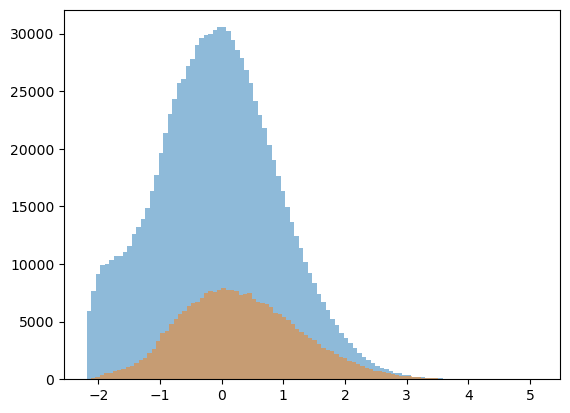

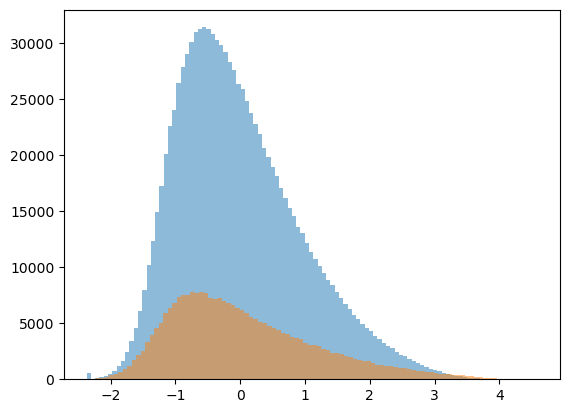

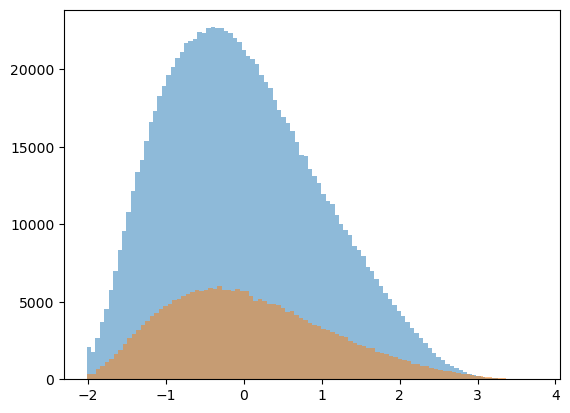

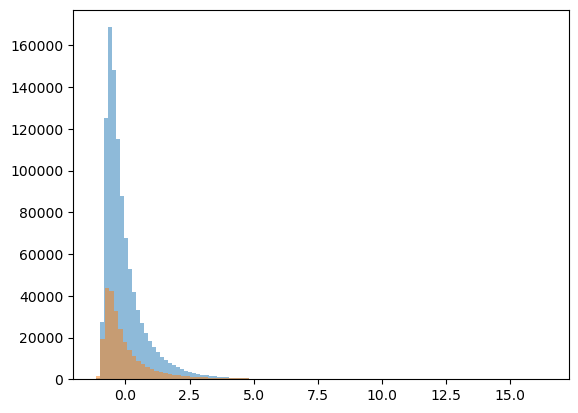

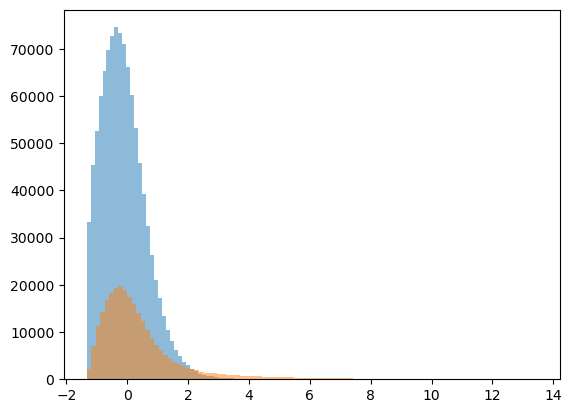

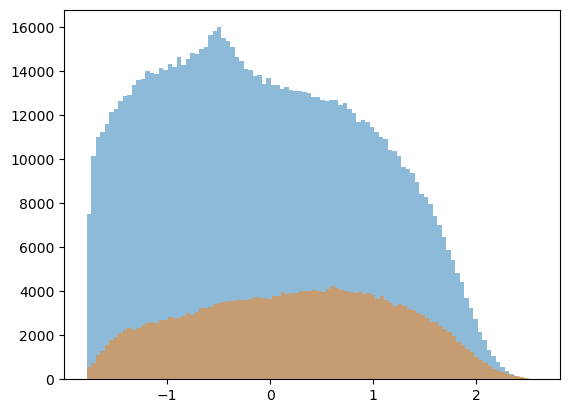

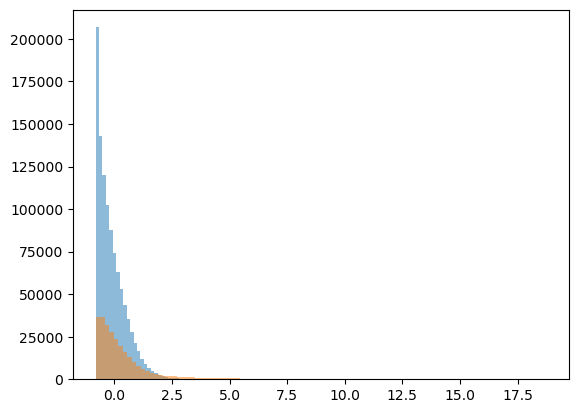

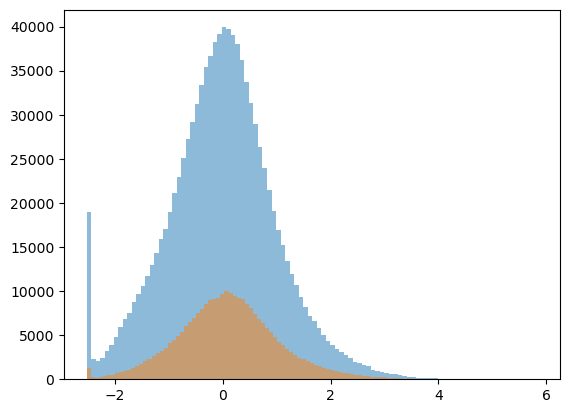

KeyboardInterrupt: 

In [45]:
from sklearn.linear_model import LogisticRegression


def train_classifier(features, decoy, qval_mask):
    # keep all decoys and targets within the qval mask
    to_keep = np.logical_or(decoy, qval_mask)
    features = features[to_keep]
    decoy = decoy[to_keep].astype(bool)

    print(len(features))

    mean = features.mean(axis=0, keepdims=True)
    std = features.std(axis=0, keepdims=True)

    # normalize features
    features = (features - mean)/std

    for i in range(features.shape[1]):
        plt.hist(features[decoy, i], bins=100, alpha=0.5, label='decoy')
        plt.hist(features[~decoy, i], bins=100, alpha=0.5, label='target')
        plt.show()

    # invert the decoy column
    decoy = ~decoy

    lr = LogisticRegression()
    lr.fit(features, decoy)
    print(lr.score(features, decoy))

    # print lr coefficients
    print(mean)
    print(std)
    print(lr.coef_)
    print(lr.intercept_)

train_classifier(features_masked, decoy_masked, qval_mask)


In [ ]:
0.7719351416881346
[[ 2.967344    1.2160938   1.426444   13.960179    0.06620345  0.44364494
   0.03138363  3.1453438 ]]
[[ 1.2583724   0.91052234  1.2126098  14.557817    0.04327635  0.24623954
   0.03225865  1.2671406 ]]
[[ 0.43898424  0.97879761  0.72262148 -0.22705527 -0.21353988  0.3174245
   0.30102549  0.44892641]]
[-0.22941813]

In [110]:
features_masked[:,3] = np.log(features_masked[:,3]+0.0001)
features_masked[:,4] = np.log(features_masked[:,4]+0.0001)

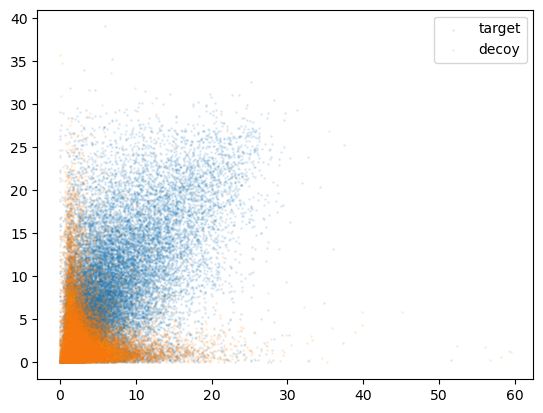

In [143]:
plt.scatter(features_masked[decoy_masked == 0,1], features_masked[decoy_masked == 0,6], label='target', alpha=0.1, s=1)
plt.scatter(features_masked[decoy_masked == 1,1], features_masked[decoy_masked == 1,6], label='decoy', alpha=0.1, s=1)
plt.legend()

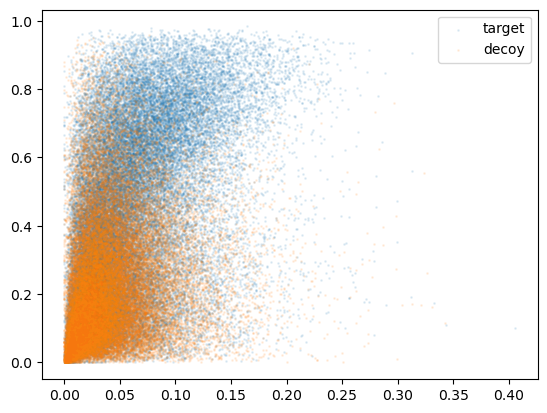

In [112]:
plt.scatter(features_masked[decoy_masked == 0,2], features_masked[decoy_masked == 0,7], label='target', alpha=0.1, s=1)
plt.scatter(features_masked[decoy_masked == 1,2], features_masked[decoy_masked == 1,7], label='decoy', alpha=0.1, s=1)
plt.legend()

(array([9.400e+01, 1.000e+00, 2.000e+00, 2.000e+00, 2.000e+00, 3.000e+00,
        2.000e+00, 0.000e+00, 2.000e+00, 4.000e+00, 4.000e+00, 3.000e+00,
        1.000e+00, 2.000e+00, 3.000e+00, 1.000e+00, 2.000e+00, 6.000e+00,
        3.000e+00, 8.000e+00, 6.000e+00, 5.000e+00, 1.100e+01, 9.000e+00,
        1.000e+01, 1.900e+01, 1.400e+01, 2.700e+01, 2.400e+01, 2.300e+01,
        2.000e+01, 4.200e+01, 5.200e+01, 4.000e+01, 7.000e+01, 6.500e+01,
        9.200e+01, 1.090e+02, 1.640e+02, 1.730e+02, 1.750e+02, 2.730e+02,
        3.100e+02, 3.620e+02, 4.590e+02, 5.290e+02, 6.800e+02, 7.320e+02,
        9.150e+02, 1.063e+03, 1.318e+03, 1.451e+03, 1.692e+03, 1.928e+03,
        2.043e+03, 2.197e+03, 2.228e+03, 2.228e+03, 2.273e+03, 2.162e+03,
        2.125e+03, 1.793e+03, 1.773e+03, 1.569e+03, 1.396e+03, 1.252e+03,
        1.122e+03, 9.850e+02, 8.450e+02, 6.870e+02, 6.350e+02, 5.230e+02,
        4.510e+02, 3.550e+02, 3.250e+02, 2.470e+02, 1.930e+02, 1.630e+02,
        1.410e+02, 8.500e+01, 8.300e+0

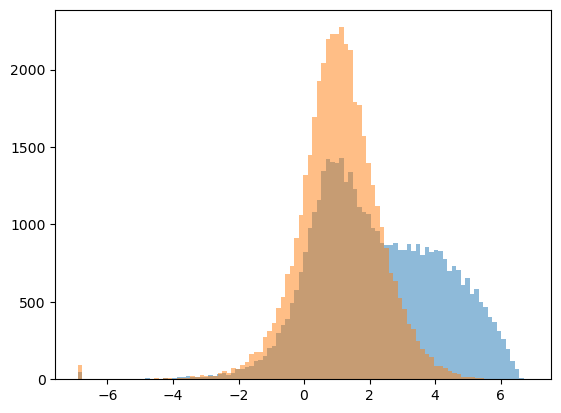

In [113]:
int_diff = np.log((features_masked[:,1] * features_masked[:,6])+0.001)
plt.hist(int_diff[decoy_masked == 0], bins=100, label='target', alpha=0.5)
plt.hist(int_diff[decoy_masked == 1], bins=100, label='decoy', alpha=0.5)

(array([178.,  83.,  53.,  49.,  59.,  58.,  59.,  59.,  52.,  63.,  41.,
         63.,  52.,  57.,  67.,  68.,  50.,  81.,  61.,  58.,  64.,  72.,
         71.,  81.,  84.,  82.,  69.,  76.,  82.,  97.,  81.,  70.,  94.,
         87., 104., 102., 116., 112., 100., 122.,  99.,  95., 104.,  91.,
         87.,  92., 109., 106.,  94., 103., 100., 101.,  83., 111.,  94.,
         91.,  92.,  79.,  76.,  79.,  56.,  61.,  64.,  66.,  55.,  59.,
         45.,  51.,  39.,  32.,  32.,  29.,  25.,  22.,  22.,  19.,  11.,
         12.,   9.,  12.,   9.,   8.,  10.,   3.,   4.,   3.,   5.,   5.,
          0.,   2.,   1.,   1.,   1.,   0.,   0.,   1.,   0.,   0.,   0.,
          1.]),
 array([-6.9077554, -6.854499 , -6.8012424, -6.7479854, -6.694729 ,
        -6.6414723, -6.588216 , -6.534959 , -6.4817023, -6.428446 ,
        -6.3751893, -6.3219323, -6.268676 , -6.2154193, -6.162163 ,
        -6.108906 , -6.0556493, -6.002393 , -5.9491363, -5.8958793,
        -5.8426228, -5.7893662, -5.7361097, -5

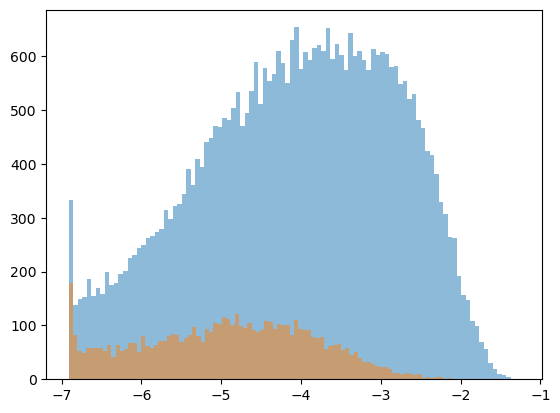

In [93]:
int_diff = np.log((features_masked[:,2] * features_masked[:,7])+0.001)
plt.hist(int_diff[decoy_masked == 0], bins=100, label='target', alpha=0.5)
plt.hist(int_diff[decoy_masked == 1], bins=100, label='decoy', alpha=0.5)

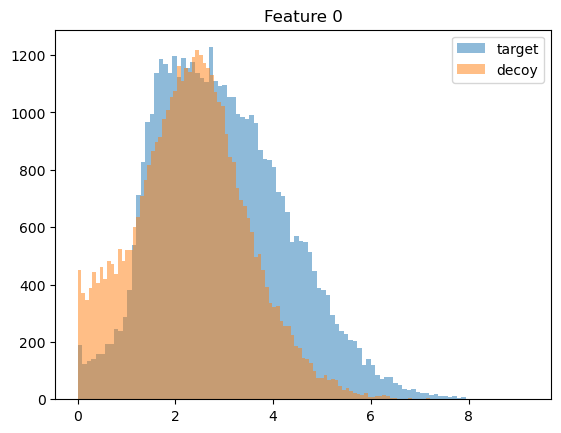

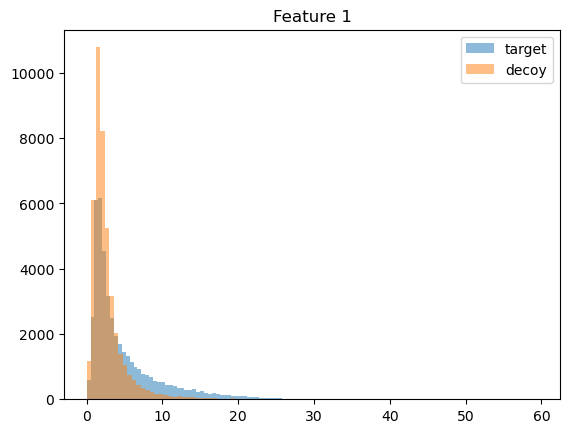

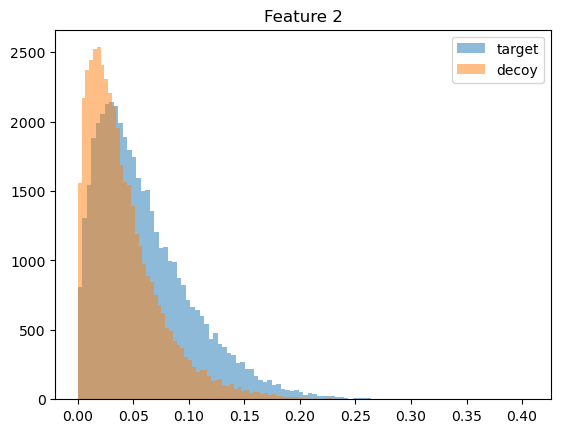

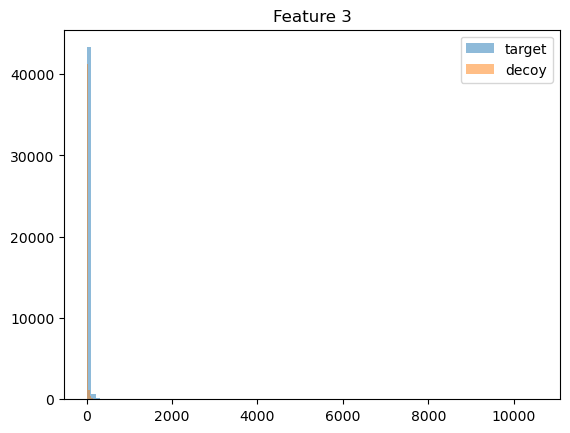

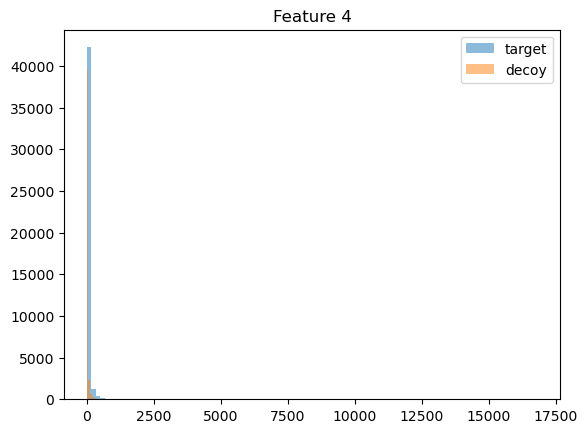

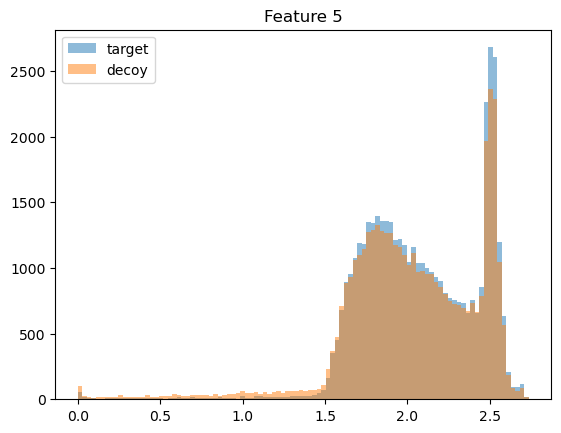

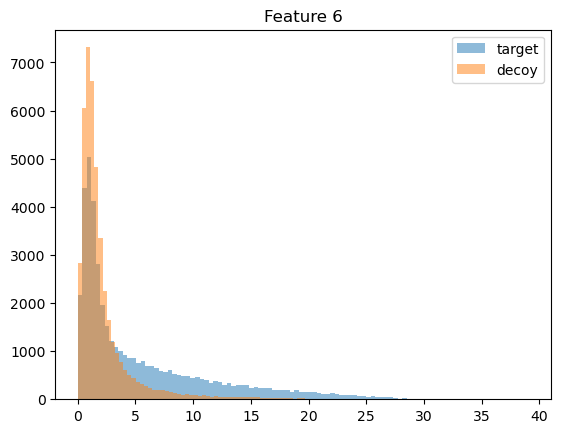

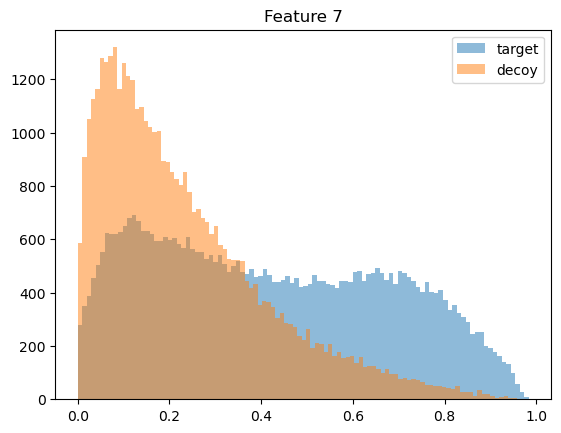

In [146]:
for i in range(features_masked.shape[1]):
    plt.figure()
    plt.hist(features_masked[decoy_masked == 0, i], label='target', bins=100, alpha=0.5)
    plt.hist(features_masked[decoy_masked == 1, i], label='decoy', bins=100, alpha=0.5)
    plt.legend()
    plt.title(f'Feature {i}')

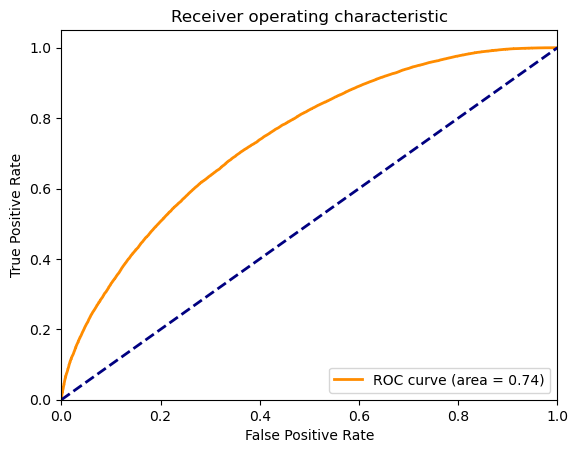

In [95]:
# train and validate a logistic regression model based on the features and decoy labels
from sklearn.linear_model import LogisticRegression
# MLP calssifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(features_masked, decoy_masked, test_size=0.2, random_state=42)

sr = StandardScaler()
lr = MLPClassifier()

X_train = sr.fit_transform(X_train)
X_test = sr.transform(X_test)


lr.fit(X_train, y_train)
y_pred = lr.predict_proba(X_test)[:,1]
roc_auc_score(y_test, y_pred)

# evaluiate the model by plotting the score distribution for the two classes (decoy and target)
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
            lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [9]:
print(features.shape)

(414938, 8)


In [108]:
from alphadia.extraction import quadrupole
q = quadrupole.SimpleQuadrupole(dia_data.cycle)

In [117]:
candidates['mz'] = candidates['precursor_mz']


  0%|          | 0/2 [00:00<?, ?it/s]

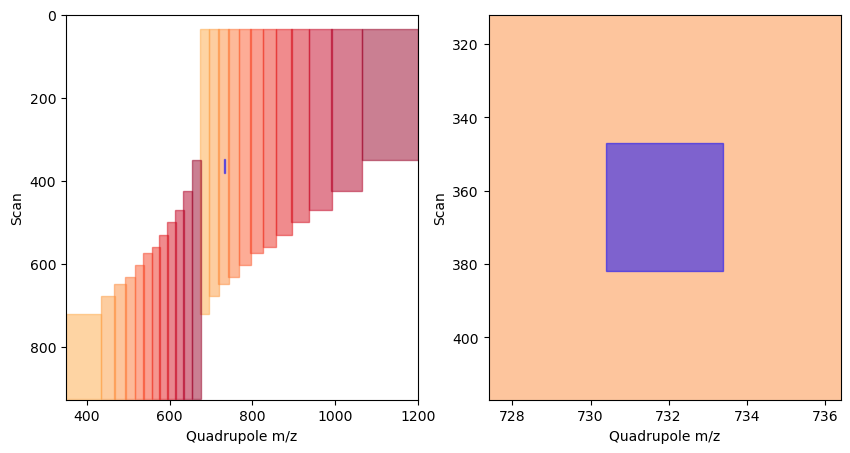

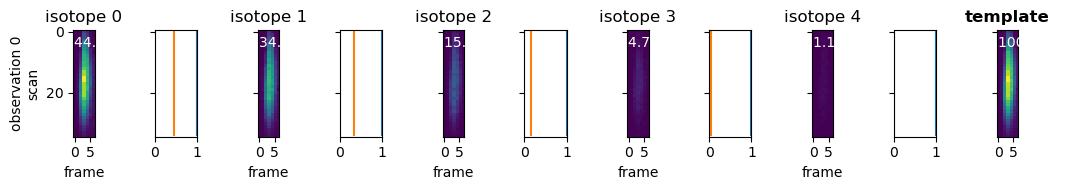

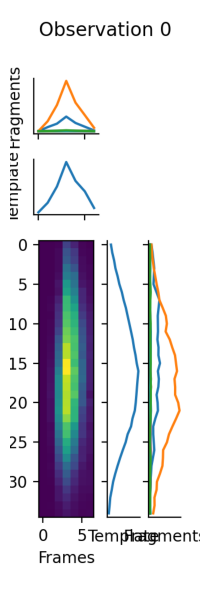

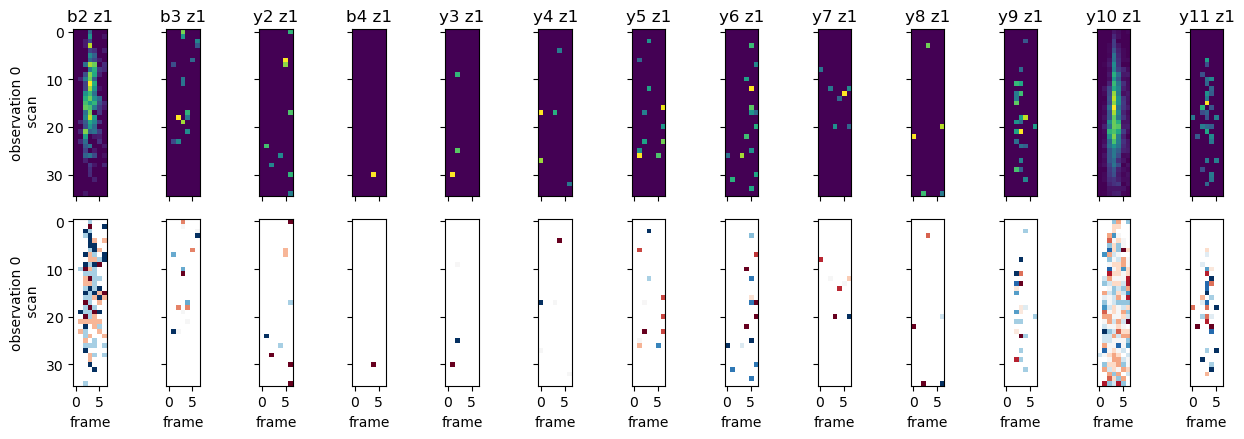

 50%|█████     | 1/2 [00:01<00:01,  1.28s/it]

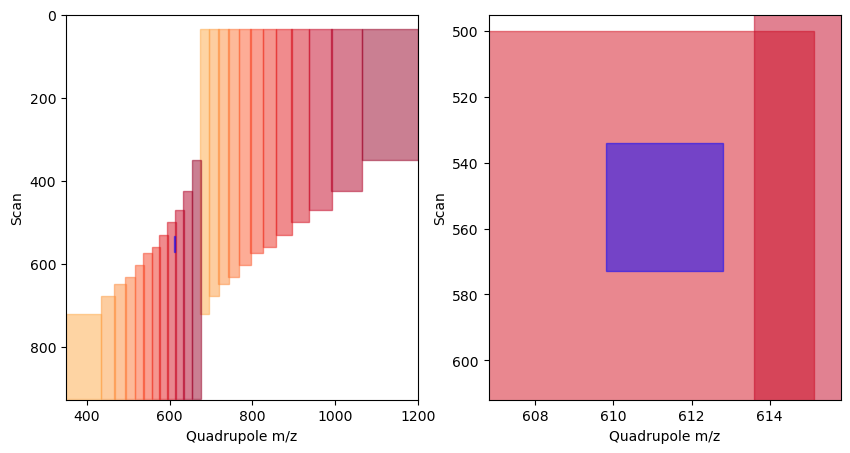

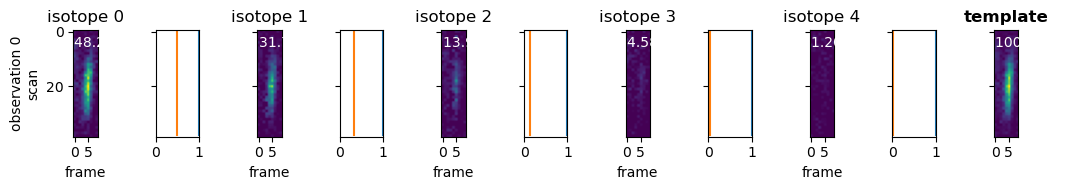

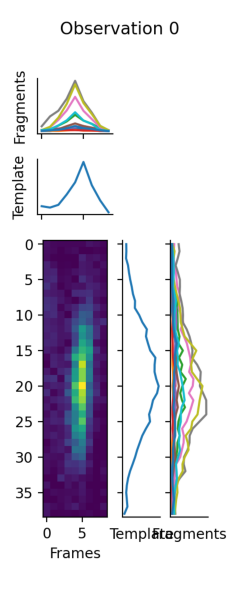

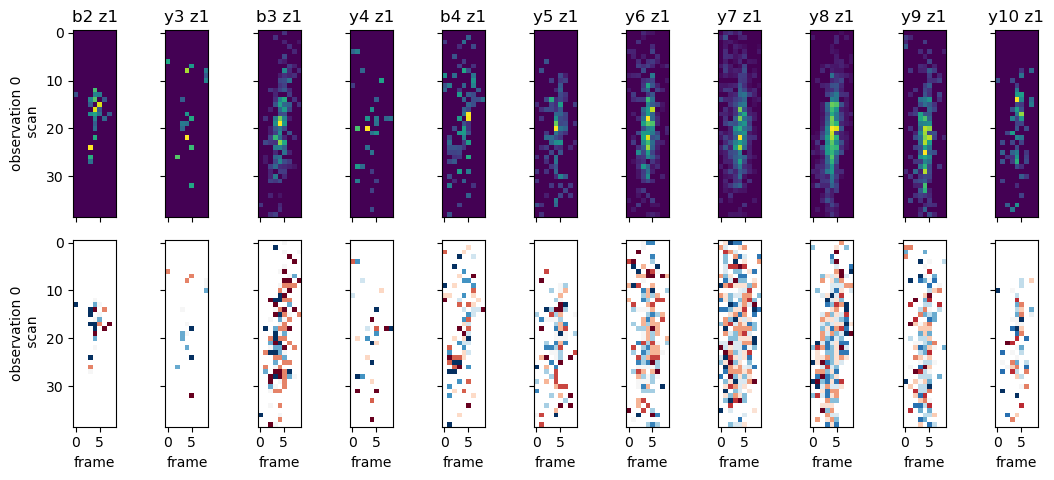

100%|██████████| 2/2 [00:02<00:00,  1.25s/it]


In [119]:
from alphadia.extraction.scoring import MS2ExtractionWorkflow

workflow = MS2ExtractionWorkflow(
    dia_data,
    precursors_flat,
    fragments_flat,
    candidates,
    q,
    precursor_mz_tolerance=15,
    fragment_mz_tolerance=15,
    fragment_mz_column='mz_calibrated',
    debug=True
)
psm = workflow()

In [111]:
psm

(   precursor_idx  elution_group_idx  charge  rank  precursor_mass_error  \
 0         230714                  2       2     0              2.743231   
 1         230714                  2       2     1              0.014830   
 2         230714                  2       2     2             -2.404601   
 3         230714                  2       2     3              1.964307   
 4         230715              76109       2     0              0.623978   
 5         230715              76109       2     1              0.971404   
 6         230715              76109       2     2              0.821897   
 7         230715              76109       2     3             -3.377354   
 8         230715              76109       2     4             -3.446375   
 
    mz_library  mz_observed  precursor_isotope_correlation  \
 0  730.896440   730.898438                       0.999893   
 1  730.896440   730.896423                       0.495449   
 2  730.896440   730.894653                       0.